Hola **Marcel**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
--
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

**Tip:** Para darle una mejor presentación a tus notebooks y que seas claro desde un inicio lo que se realizará, podrías dejar siempre al inicio del notebook en una celda tipo markdown un título general del proyecto y una breve introducción al mismo
</div>

# Paso 1. Preparación de los datos para el análisis

## 1.1 Librerías:

In [1]:
# librerías a importar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2 Carga DB:

In [2]:
# Carga de datos
visit= pd.read_csv("/datasets/visits_log_us.csv")
order= pd.read_csv("/datasets/orders_log_us.csv")
cost= pd.read_csv("/datasets/costs_us.csv")

## 1.3 Calidad de los datos:

### 1.3.1 DF Visits:

In [3]:
# Info DF Visit
visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
# Primeras 5 filas del DF Visit
visit.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
# Estadísticas descriptiva DF Visit
visit.describe(include='all') # include='all' para ver también de objetos/categorías

,Device,End Ts,Source Id,Start Ts,Uid
count,359400,359400,359400.000000,359400,3.594000e+05
unique,2,224760,NaN,224303,NaN
top,desktop,2017-11-24 16:51:00,NaN,2017-11-24 16:06:00,NaN
freq,262567,23,NaN,19,NaN
mean,NaN,NaN,3.750515,NaN,9.202557e+18
std,NaN,NaN,1.917116,NaN,5.298433e+18
min,NaN,NaN,1.000000,NaN,1.186350e+13
25%,NaN,NaN,3.000000,NaN,4.613407e+18
50%,NaN,NaN,4.000000,NaN,9.227413e+18
75%,NaN,NaN,5.000000,NaN,1.372824e+19


In [6]:
# Filas duplicadas en el DF Visit
print(visit.duplicated().sum())

0


#### 1.3.1.1 Limpieza y Preprocesamiento DF Visits:

In [7]:
# Nombres de columnas
visit.columns = [col.lower().replace(' ', '_') for col in visit.columns]

In [8]:
# Validar nombres de columnas
visit.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [9]:
# Tipos de datos
# Formato fecha para DF Visit
visit['start_ts'] = pd.to_datetime(visit['start_ts'])
visit['end_ts'] = pd.to_datetime(visit['end_ts'])

In [10]:
# Validar fechas
visit.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


#### 1.3.1.2 Validando cambios DF Visit:

In [11]:
# Validando cambios DF Visit
visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


#### 1.3.1.3 RESUMEN DF Visit:
- Carga del Dataset: Se cargó el archivo visits_log_us.csv en un DataFrame llamado visit.
- Estandarización de Nombres de Columnas: Las columnas se renombraron a formato snake_case (minúsculas y guiones bajos) para facilitar la manipulación.
- Conversión de Tipos de Datos: Las columnas start_ts y end_ts se convirtieron al tipo de dato datetime para permitir análisis temporales.
- Verificación Inicial: Se utilizaron .head(), .info(), .describe(), .shape y .duplicated().sum() para una primera inspección y validación de los datos y los cambios realizados.

### 1.3.2 DF Order:

In [12]:
# Info DF Order
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [13]:
# Primeras 5 filas del DF Order
order.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [14]:
# Estadísticas descriptiva DF Order
order.describe(include='all') # include='all' para ver también de objetos/categorías

,Buy Ts,Revenue,Uid
count,50415,50415.000000,5.041500e+04
unique,45991,NaN,NaN
top,2018-05-31 10:13:00,NaN,NaN
freq,9,NaN,NaN
mean,NaN,4.999647,9.098161e+18
std,NaN,21.818359,5.285742e+18
min,NaN,0.000000,3.135781e+14
25%,NaN,1.220000,4.533567e+18
50%,NaN,2.500000,9.102274e+18
75%,NaN,4.890000,1.368290e+19


In [15]:
# Filas duplicadas en el DF Order
print(order.duplicated().sum())

0


#### 1.3.2.1 Limpieza y Preprocesamiento DF Order:

In [16]:
# Nombres de columnas
order.columns = [col.lower().replace(' ', '_') for col in order.columns]

In [17]:
# Validar nombres de columnas
order.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [18]:
# Para el DF Order
order['buy_ts'] = pd.to_datetime(order['buy_ts'])

In [19]:
# Validar fechas
order.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


#### 1.3.2.2 Validando cambios DF Order:

In [20]:
# Validando cambios DF Order
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


#### 1.3.2.3 RESUMEN DF Order:
- Carga del Dataset: Se cargó el archivo orders_log_us.csv en un DataFrame llamado order.
- Estandarización de Nombres de Columnas: Las columnas se renombraron a formato snake_case (minúsculas y guiones bajos) para facilitar la manipulación.
- Conversión de Tipos de Datos: La columna buy_ts se convirtió al tipo de dato datetime para permitir análisis temporales.
- Verificación Inicial: Se utilizaron .head(), .info(), .describe(), .shape y .duplicated().sum() para una primera inspección y validación de los datos y los cambios realizados.

### 1.3.1 DF Cost:

In [21]:
# Info DF Cost
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [22]:
# Primeras 5 filas del DF Visit
cost.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [23]:
# Estadísticas descriptiva DF Cost
cost.describe(include='all') # include='all' para ver también de objetos/categorías

,source_id,dt,costs
count,2542.000000,2542,2542.000000
unique,NaN,364,NaN
top,NaN,2018-04-26,NaN
freq,NaN,7,NaN
mean,4.857199,NaN,129.477427
std,3.181581,NaN,156.296628
min,1.000000,NaN,0.540000
25%,2.000000,NaN,21.945000
50%,4.000000,NaN,77.295000
75%,9.000000,NaN,170.065000


In [24]:
# Filas duplicadas en el DF Cost
print(cost.duplicated().sum())

0


#### 1.3.3.1 Limpieza y Preprocesamiento DF Cost:

In [25]:
# Nombres de columnas
cost.columns = [col.lower().replace(' ', '_') for col in cost.columns]

In [26]:
# Validar nombres de columnas
cost.columns

Index(['source_id', 'dt', 'costs'], dtype='object')

In [27]:
# Para el DF Cost
cost['dt'] = pd.to_datetime(cost['dt'])

In [28]:
# Validar fechas
cost.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


#### 1.3.3.2 Validando cambios DF Cost:

In [29]:
# Validando cambios DF Cost
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


#### 1.3.3.3 RESUMEN DF Cost:
- Carga del Dataset: Se cargó el archivo costs_us.csv en un DataFrame llamado costs.
- Estandarización de Nombres de Columnas: Las columnas se renombraron a formato snake_case (minúsculas y guiones bajos) para facilitar la manipulación.
- Conversión de Tipos de Datos: La columna dt se convirtió al tipo de dato datetime para permitir análisis temporales.
- Verificación Inicial: Se utilizaron .head(), .info(), .describe(), .shape y .duplicated().sum() para una primera inspección y validación de los datos y los cambios realizados.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el análisis inicial de tus dataset, siempre es importante primero revisar la calidad de los datos y el tipo de los mismos antes de pasar a cualquier análisis
</div>

# Paso 2. Informes y calculo de métricas

#### Se pretende conocer a fondo el comportamiento de nuestros usuarios y dinámica de las ventas, para la toma de decisiones estratégicas. Nos adentramos a los datos de Showz desde enero 2017 hasta diciembre 2018, con el fin de observar patrones clave y métricas de rendimiento.

##### Comportamiento del Usuario y Engagement (Análisis de Visitas): 
- ¿Quiénes son nuestros usuarios activos, con qué frecuencia interactúan con la plataforma, la duración de sus sesiones y qué tan 'pegajosos' e intensos son nuestros servicios? Para identificar tendencias de crecimiento, picos de actividad y oportunidades de impulsar mayor lealtad.

##### Rendimiento Comercial (Análisis de Ventas): 
- ¿Cuántificar la eficiencia de nuestro embudo de conversión desde el primer contacto hasta la compra?. Analizar patrones de pedido, tamaño de transacciones y valor a largo plazo aportado por cada usuario. Se busca una visión clara de la salud financiera y áreas potenciales para optimizar la monetización.
- En fin, cuantificar el desempeño actual de Showz y extraer conclusiones accionables que informen futuras estrategias de producto, marketing y negocio.

## 2.1 Visitas:

### 2.1.1 Usuarios Diarios, Semanales y Mensuales (DAU, WAU, MAU):

In [30]:
# Extraer fecha, semana y mes de la columna start_ts (extraer componentes de tiempo)
visit['session_date'] = visit['start_ts'].dt.date
visit['session_week'] = visit['start_ts'].dt.week
visit['session_month'] = visit['start_ts'].dt.month
visit['session_year'] = visit['start_ts'].dt.year # Manejo correcto de años


In [31]:
# Calcular DAU, WAU, MAU:
# DAU (Daily Active Users): Agrupa por session_date y cuenta usuarios únicos (uid).
dau = visit.groupby('session_date')['uid'].nunique().reset_index()
dau.columns = ['date', 'active_users'] # renombrar columnas
print("\nUsuarios Activos Diarios (DAU):")
print(dau.head())


Usuarios Activos Diarios (DAU):
         date  active_users
0  2017-06-01           605
1  2017-06-02           608
2  2017-06-03           445
3  2017-06-04           476
4  2017-06-05           820


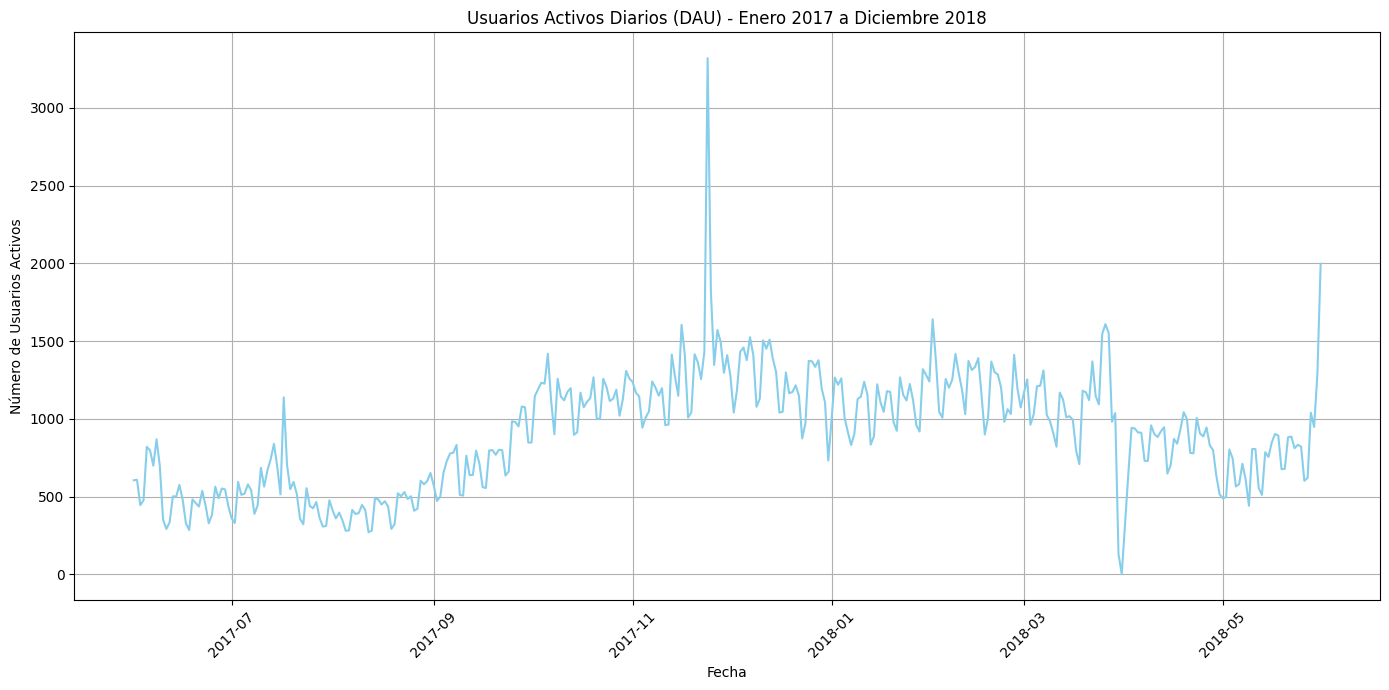

In [32]:
# Gráfico de Usuarios Activos Diarios (DAU)
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='active_users', data=dau, color='skyblue')
plt.title('Usuarios Activos Diarios (DAU) - Enero 2017 a Diciembre 2018')
plt.xlabel('Fecha')
plt.ylabel('Número de Usuarios Activos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Conclusiones previas:
- Tendencia general ascendente en número de usuarios activos diarios, desde principios de 2017 a finales del 2018.
- Algunas fluctuaciones.
- Pico a finales de 2017 y otro por mayo 2018, pudiese ser por campañas de marketing exitosas u eventos de alto tráfico.

In [33]:
# WAU (Weekly Active Users): Agrupa por una combinación de año y semana (session_year, session_week) y cuenta usuarios únicos.
wau = visit.groupby(['session_year', 'session_week'])['uid'].nunique().reset_index()
wau.columns = ['year', 'week', 'active_users']
print("\nUsuarios Activos Semanales (WAU):") # renombrar columnas
print(wau.head())


Usuarios Activos Semanales (WAU):
   year  week  active_users
0  2017    22          2021
1  2017    23          4129
2  2017    24          2812
3  2017    25          2878
4  2017    26          3064


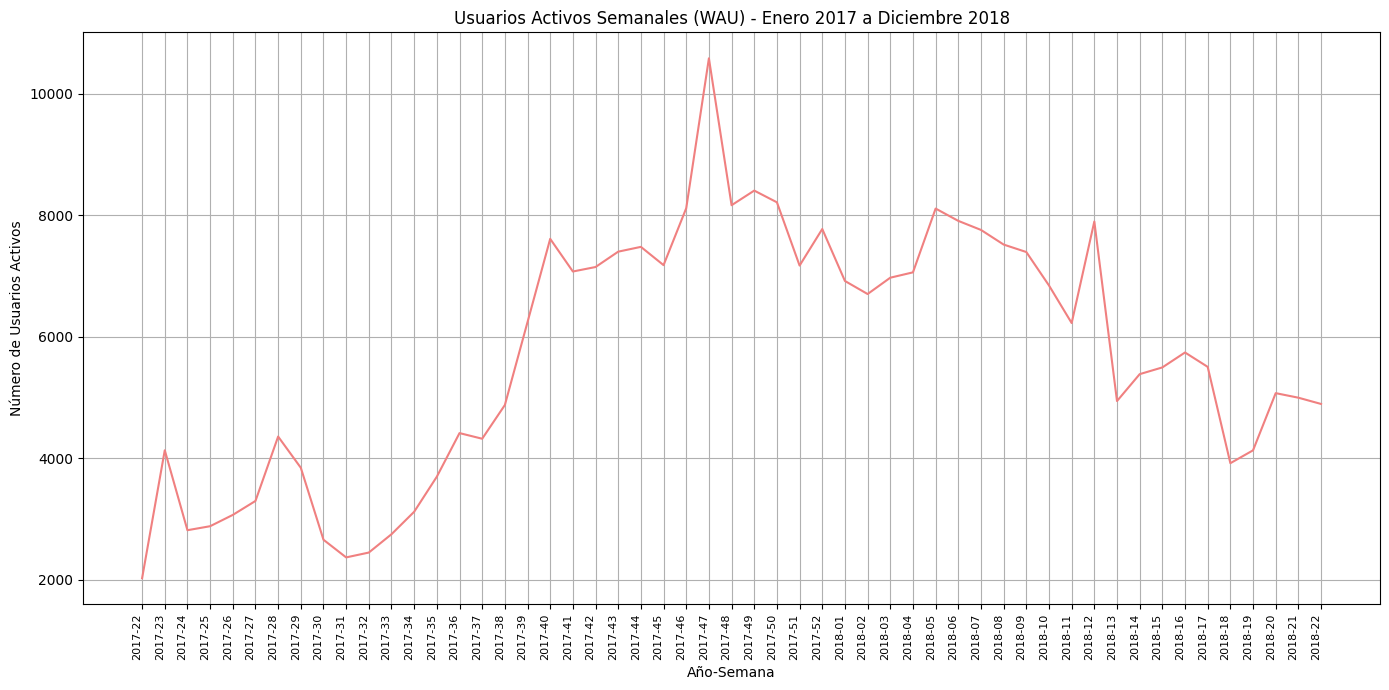

In [34]:
# Gráfico de Usuarios Activos Semanales (WAU)
# Columna para el eje x que combine año y semana
wau['year_week_str'] = wau['year'].astype(str) + '-' + wau['week'].astype(str).str.zfill(2)
wau_sorted = wau.sort_values('year_week_str') # ordenados

plt.figure(figsize=(14, 7))
sns.lineplot(x='year_week_str', y='active_users', data=wau_sorted, color='lightcoral')
plt.title('Usuarios Activos Semanales (WAU) - Enero 2017 a Diciembre 2018')
plt.xlabel('Año-Semana')
plt.ylabel('Número de Usuarios Activos')
plt.grid(True)
plt.xticks(rotation=90, ha='right', fontsize=8) # Rotar para muchas semanas
plt.tight_layout()
plt.show()

#### Conclusiones previas:
- Igual que el gráfico de DAU, este posee una tendencia de crecimiento durante todo el periodo (a mediados de 2017 y finales de 2017)
- Se observa pico en semanas 47-48 de 2017; aunque con fluctuaciones.
- La base de usuarios activos por semana parece consolidarse en un rango más alto a partir de finales de 2017 y principios de 2018. Luego se da una caída a finales de 2018 y una recuperación parcial; lo cual, pudiese sugerir alguna estacionalidad o campañas de marketing.

In [35]:
# MAU (Monthly Active Users): Agrupa por una combinación de año y mes (session_year, session_month) y cuenta usuarios únicos.
mau = visit.groupby(['session_year', 'session_month'])['uid'].nunique().reset_index()
mau.columns = ['year', 'month', 'active_users'] # renombrar columnas
print("\nUsuarios Activos Mensuales (MAU):")
print(mau.head())


Usuarios Activos Mensuales (MAU):
   year  month  active_users
0  2017      6         13259
1  2017      7         14183
2  2017      8         11631
3  2017      9         18975
4  2017     10         29692


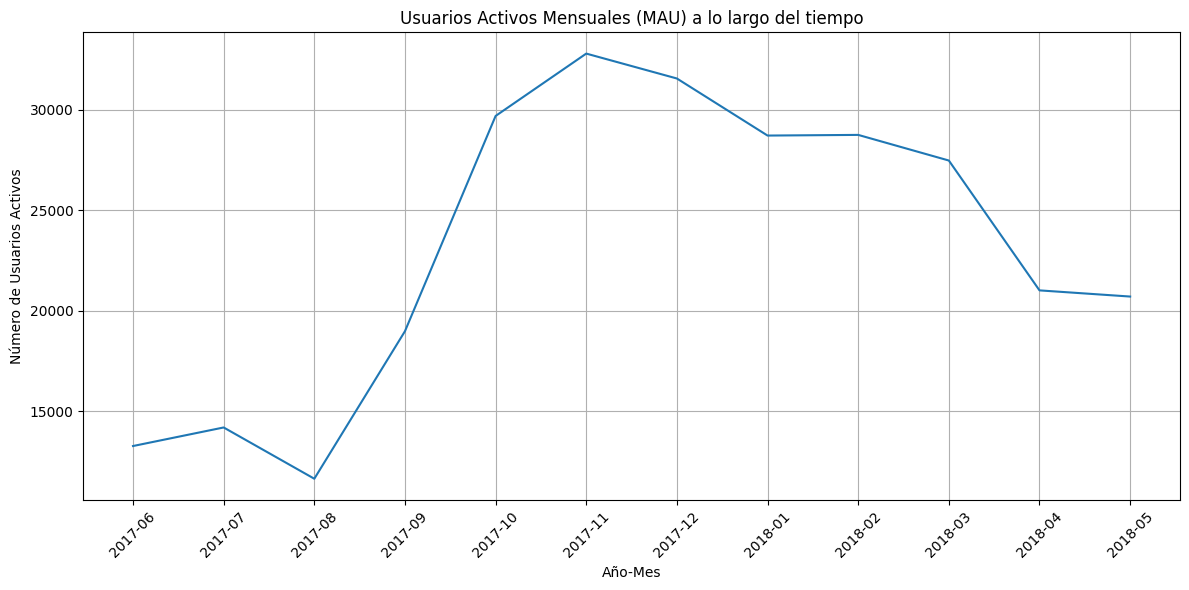

In [36]:
# Ejemplo de visualización de MAU
plt.figure(figsize=(12, 6))
mau['year_month'] = mau['year'].astype(str) + '-' + mau['month'].astype(str).str.zfill(2)
mau.sort_values('year_month', inplace=True)
sns.lineplot(x='year_month', y='active_users', data=mau)
plt.title('Usuarios Activos Mensuales (MAU) a lo largo del tiempo')
plt.xlabel('Año-Mes')
plt.ylabel('Número de Usuarios Activos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Conclusiones previas:
- MAU denota un crecimiento constante en la base de usuarios mensuales activos desde mediados de 2017 y alcanza un pico a finales de 2017, entre octubre y noviembre (más de 30 mil usuarios activos).
- Luego desciende gradualmente y de forma estable número de usuarios activos mensuales durante 2018 (pudiese ser por una maduración del mercado o que se requieran nuevas estrategias para mantener el crecimiento.
- La tendencia general parece indicar un éxito inicial en la adquisición, pero por otro lado, existen desafíos de retención o mantenimiento del ritmo en el 2do año.

### 2.1.2 ¿Cuántas sesiones hay por día?

In [37]:
# Agrupar por session_date usando .size() para # de sesiones.

# Sesiones por día
sessions_per_day = visit.groupby('session_date').size().reset_index(name='total_sessions')

# Primeras 5 filas
print(sessions_per_day.head())

  session_date  total_sessions
0   2017-06-01             664
1   2017-06-02             658
2   2017-06-03             477
3   2017-06-04             510
4   2017-06-05             893


In [38]:
# Estadísticas descriptivas - sesiones por día - redondeado
print(sessions_per_day['total_sessions'].describe().round(0))

count     364.0
mean      987.0
std       419.0
min         1.0
25%       636.0
50%      1003.0
75%      1280.0
max      4042.0
Name: total_sessions, dtype: float64


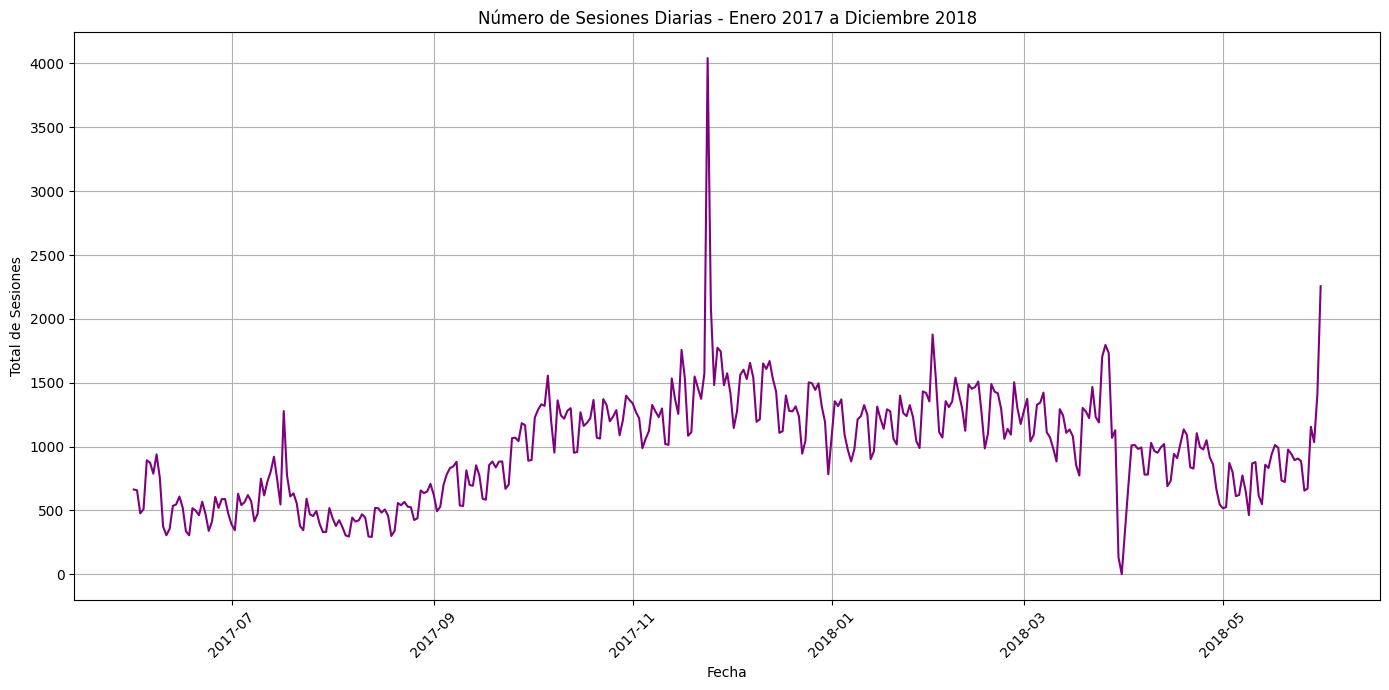

In [39]:
# Gráfico sesiones por día
plt.figure(figsize=(14, 7))
sns.lineplot(x='session_date', y='total_sessions', data=sessions_per_day, color='purple')
plt.title('Número de Sesiones Diarias - Enero 2017 a Diciembre 2018')
plt.xlabel('Fecha')
plt.ylabel('Total de Sesiones')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Conclusiones previas:
- Alta variabilidad diaria con un pico extremo (más de 4 mil sesiones) en un día a finales de 2017.
- Coincide con los picos observados en DAU y WAU y se sugiere un evento o campaña de marketing muy exitosa.
- El # de sesiones diarias se mueve en un rango promedio de 987 sesiones al día aproximadamente, desviación estándar importante de 419 (confirma alta fluctuación).
- Mediana de 1003 sesiones muy cercana a la media. La distribución es un tanto simétrica fuera de los valores extremos.
- El hecho de un mínimo de 1 sesión en un día, pudiese signficar días inactivos casi en su totalidad. O pudiesen ser errores de registro.
- El máximo de 4042 sesiones sugiere una gran capacidad del sitio por gestionar altos picos de tráfico.

### 2.1.3  ¿Cuál es la duración de cada sesión?

In [40]:
# Diferencia entre end_ts y start_ts en visit y en segundos
visit['session_duration_sec'] = (visit['end_ts'] - visit['start_ts']).dt.total_seconds()

# Primeras 5 filas con nueva columna
print(visit[['start_ts', 'end_ts', 'session_duration_sec']].head())

             start_ts              end_ts  session_duration_sec
0 2017-12-20 17:20:00 2017-12-20 17:38:00                1080.0
1 2018-02-19 16:53:00 2018-02-19 17:21:00                1680.0
2 2017-07-01 01:54:00 2017-07-01 01:54:00                   0.0
3 2018-05-20 10:59:00 2018-05-20 11:23:00                1440.0
4 2017-12-27 14:06:00 2017-12-27 14:06:00                   0.0


In [41]:
# Estadísticas descriptivas de la duración (en segundos):")
print(visit['session_duration_sec'].describe())

count    359400.000000
mean        643.025687
std         997.127761
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_duration_sec, dtype: float64


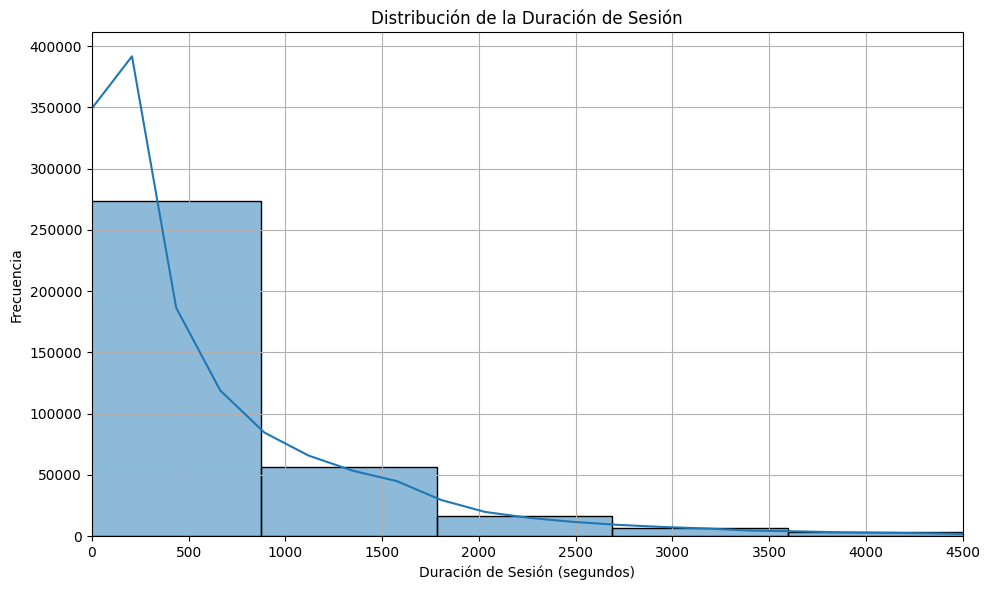

In [42]:
# Gráfico Histograma
plt.figure(figsize=(10, 6))
# Es común sesiones muy cortas (rebote) y largas (posibles errores), podemos limitar el eje x para una mejor visualización de la mayoría de las sesiones.
sns.histplot(visit['session_duration_sec'], bins=50, kde=True)
plt.title('Distribución de la Duración de Sesión')
plt.xlabel('Duración de Sesión (segundos)')
plt.ylabel('Frecuencia')
plt.xlim(0, visit['session_duration_sec'].quantile(0.99)) # Limita el eje X al percentil 99 para excluir valores atípicos extremos
plt.grid(True)
plt.tight_layout()
plt.show()

#### Conclusiones previas:
- Estadísticas descriptivas e histograma:
    - Distribución en la duración de sesiones sesgada a la derecha de forma significativa. Media de 643 segundos o aprox. 10.7 minutos y mayor que la mediana de 300 segundos o 5 minutos.
    - Hay un número significativo de sesiones cortas pero algunas son muy largas, las cuales empujan la media hacia arriba.
    - 75% de las sesiones duran 840 segundos (aprox. 14 minutos). Esto confirma que la mayor parte de interacciones son breves.
    - La existencia de un min de -2760 segundos es un valor atípico debido posiblemente a un error de datos que se debe investigar, pues obviamente no puede existir ninguna duración negativa.
    - El máximo es de 42 660 segundos (aprox. 11.85 horas), un valor muy extremo, ya sea por alguna sesión abierta o un error.

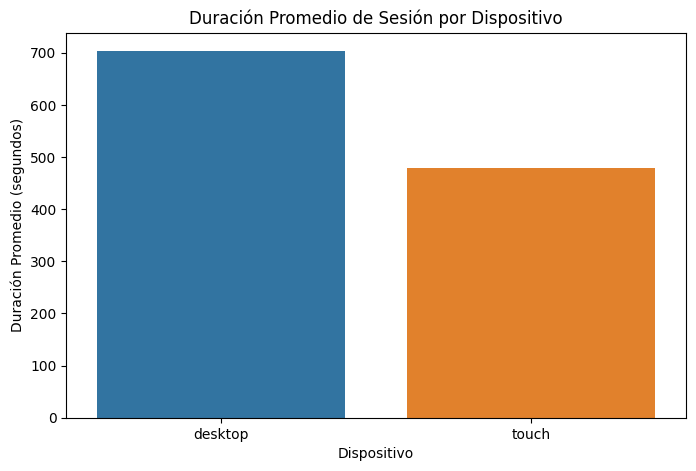

In [43]:
# Sesiones promedio por dispositivo 'device'
session_duration_by_device = visit.groupby('device')['session_duration_sec'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='device', y='session_duration_sec', data=session_duration_by_device)
plt.title('Duración Promedio de Sesión por Dispositivo')
plt.xlabel('Dispositivo')
plt.ylabel('Duración Promedio (segundos)')
plt.show()

#### Conclusiones previas:
- Duración promedio por dispositivo:
    - El gráfico de barras muestra a los usuarios de dispositivos de escritorio (desktop) con una duración promedio de sesión bastante más alta (aprox. 700 segundos) al compararla con la de los dispositivos táctiles (touch) de aprox. 480 segundos. Sugiere que los usuarios de escritorio estarían posiblemente realizando tareas más complejas, navegando de forma más extendida o profunda, o simple y sencillamente invirtiendo más tiempo en cada una de las sesiones dentro de "Showz".
    - Diferencia crucial para comprender cómo los usuarios interactúan con el servicio en función de los dispositivos.

### 2.1.4 ¿Con qué frecuencia los usuarios regresan?

In [44]:
# Preparar datos para cálculo Sticky Factor (agrupar y obtener DAU, WAU y MAU para cada mes calendario)
# Crear columnas
visit['session_date'] = visit['start_ts'].dt.to_period('D') # diario
visit['session_week_period'] = visit['start_ts'].dt.to_period('W') # semanal
visit['session_month_period'] = visit['start_ts'].dt.to_period('M') # mensual

In [45]:
# Cálculo DAU, WAU, MAU (nivel de cada mes para ratios)
# DAU_monthly_avg (Promedio de usuarios únicos por día dentro de cada mes)
dau_monthly_avg = visit.groupby('session_month_period')['session_date', 'uid'].agg(daily_users=('uid', 'nunique')).groupby('session_month_period')['daily_users'].mean().reset_index()

dau_monthly_avg.columns = ['month_period', 'avg_daily_users']

In [46]:
# Usuarios únicos por mes (MAU)
mau_sticky = visit.groupby('session_month_period')['uid'].nunique().reset_index()
mau_sticky.columns = ['month_period', 'mau']

# Usuarios únicos por semana (WAU) - cálculo y promedio para ratio mensual
wau_raw = visit.groupby('session_week_period')['uid'].nunique().reset_index()
wau_raw.columns = ['week_period', 'wau']

# Usuarios únicos por día (DAU) - cálculo y promedio para ratio mensual
dau_raw = visit.groupby('session_date')['uid'].nunique().reset_index()
dau_raw.columns = ['date_period', 'dau']

In [47]:
# Convertir Period a Timestamp
dau_raw['date'] = dau_raw['date_period'].dt.start_time
wau_raw['week_start_date'] = wau_raw['week_period'].dt.start_time
mau_sticky['month_start_date'] = mau_sticky['month_period'].dt.start_time

# Cálculo DAU_avg_per_mont h (promedio DAU por día dentro del mes)
dau_per_month_avg = dau_raw.copy()
dau_per_month_avg['month_period'] = dau_per_month_avg['date'].dt.to_period('M')
dau_per_month_avg = dau_per_month_avg.groupby('month_period')['dau'].mean().reset_index()
dau_per_month_avg.columns = ['month_period', 'avg_dau']

# Para gráfico combinado (fechas de inicio de mes/semana) y luego plotear ratios

# Calcular DAU/MAU
df_sticky = pd.merge(dau_per_month_avg, mau_sticky, on='month_period')
df_sticky['dau_mau_ratio'] = df_sticky['avg_dau'] / df_sticky['mau']

# Calcular WAU/MAU
# Ratio WAU/MAU a nivel semanal.
wau_monthly_merge = wau_raw.copy()
wau_monthly_merge['month_period'] = wau_monthly_merge['week_start_date'].dt.to_period('M')

# Fusionar WAU semanales y MAU mensuales para obtener ratio por semana
df_sticky_wau = pd.merge(wau_monthly_merge, mau_sticky, on='month_period')
df_sticky_wau['wau_mau_ratio'] = df_sticky_wau['wau'] / df_sticky_wau['mau']

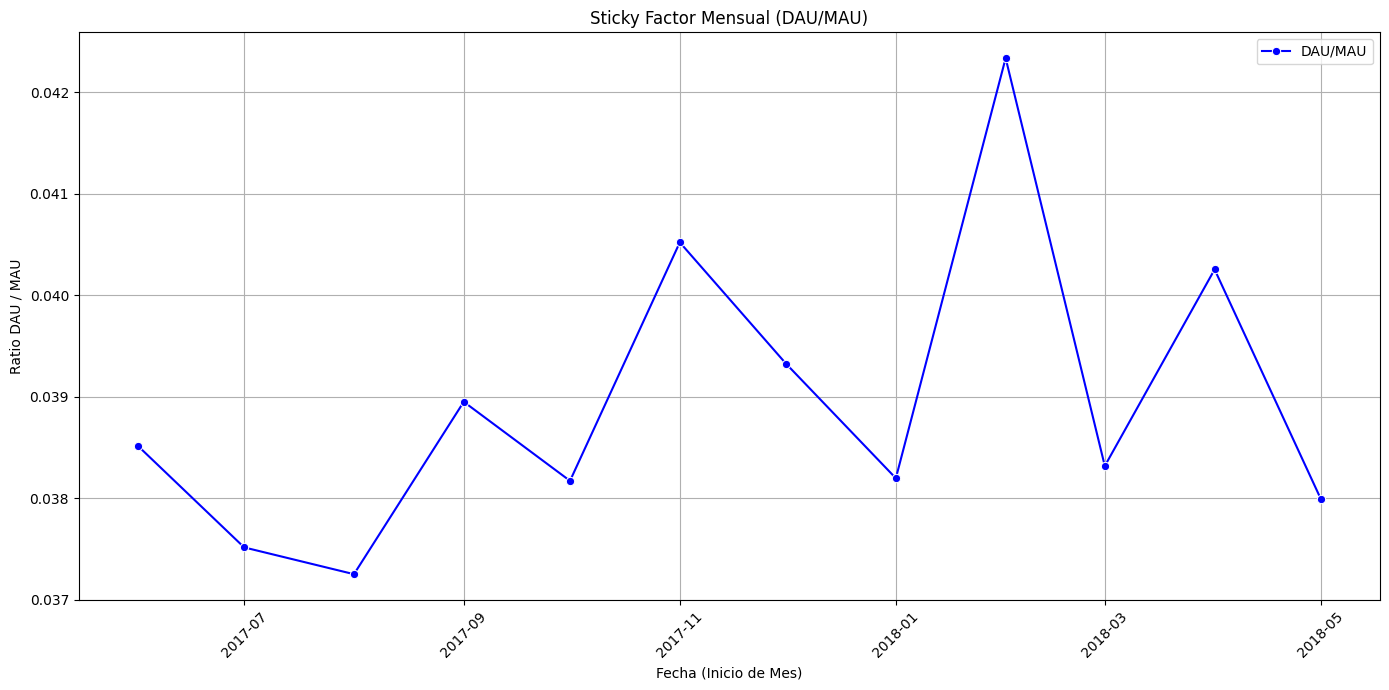

In [48]:
# Gráfico Sticky Factor (DAU/MAU) mensual
plt.figure(figsize=(14, 7))
sns.lineplot(x=df_sticky['month_period'].dt.start_time, y='dau_mau_ratio', data=df_sticky, marker='o', color='blue', label='DAU/MAU')
plt.title('Sticky Factor Mensual (DAU/MAU)')
plt.xlabel('Fecha (Inicio de Mes)')
plt.ylabel('Ratio DAU / MAU')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Conclusiones previas Sticky Factor Mensual (DAU/MAU):
- Este gráfico muestra la proporción de usuarios activos mensuales que a su vez son activos diariamente.
- La métrica se mantiene en rango ligeramente bajo (0.037 - 0.043) o (3.7% - 4.3%). Sugiriendo que en un mes en específico sólo un porcentaje pequeño de usuarios activos mensuales, interactúa también con Showz diariamente.
- Picos en esta conducta entre noviembre 2017 y marzo 2018, pudiesen ser una correlación de eventos específicos. como lo mencionamos anteriormente, campañas de marketing o lanzamientos de algunas funcionalidades que estimularon el uso frecuente.
- La fluctuación denota un patrón de uso en los usuarios mensuales que no es consistente, por cuanto pudiese obedecer más a otros factores externos e incluso internos de la plataforma.

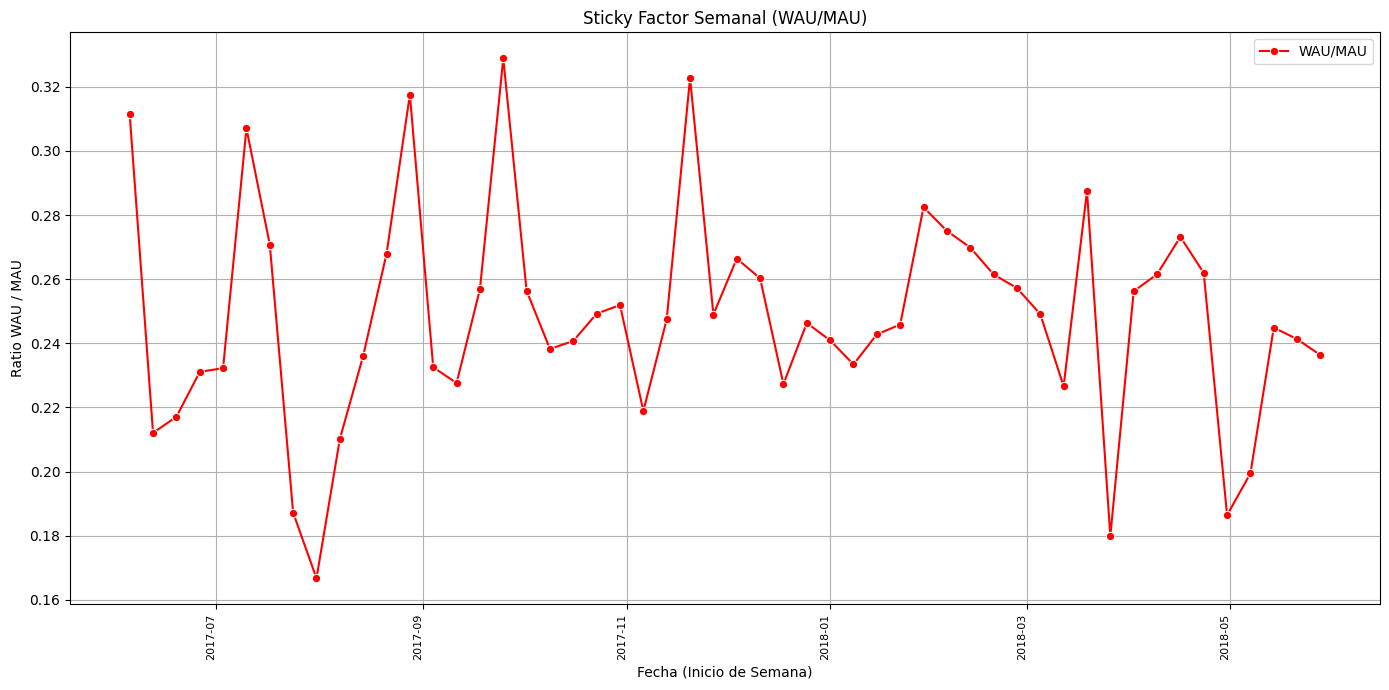

In [49]:
# Gráfico de Sticky Factor (WAU/MAU) semanal
plt.figure(figsize=(14, 7))

df_sticky_wau.sort_values(by='week_start_date', inplace=True)
sns.lineplot(x='week_start_date', y='wau_mau_ratio', data=df_sticky_wau, marker='o', color='red', label='WAU/MAU')
plt.title('Sticky Factor Semanal (WAU/MAU)')
plt.xlabel('Fecha (Inicio de Semana)')
plt.ylabel('Ratio WAU / MAU')
plt.grid(True)
plt.xticks(rotation=90, ha='right', fontsize=8) # rotar para muchas semanas
plt.tight_layout()
plt.show()

#### Conclusiones previas Sticky Factor Semanal (WAU/MAU):
- Indica la proporción de usuarios activos mensuales que además son también activos en una semana dada.
- Distinto del DAU/MAU, este ratio es mucho más alto (aprox. 0.17 y 0.32) es decir, entre 17% y 32%. Lo cual sugiere que si la interacción diaria pudiese ser baja, una porción significativa entre 1/5 y 1/3 de los usuarios mensuales, efectivmante sí regresa semanalmente. Indica un nivel de engagement semanal más robusto.
- Las fluctuaciones son más pronunciadas que en el DAU/MAU. Picos alrededor de agosto y noviembre 2017, posteriormente una tendencia baja generalizada en 2018 con algunas recuperaciones intermitentes.
- Los valles pronunciados (a finales de 2017 y principios de 2018) pudiesen coincidir con periodos festivos o vacaciones, dentro de los cuales la actividad disminuye.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, se analizó de manera adecuada esta sección con las gráficas correctas y con su respectiva interpretación luego de mostrarlas lo que deja un proceso de análisis mucho más limpio y claro
</div>

### Conclusiones generales sobre el aspecto de: Análisis de visitas y usuarios, datos clave y Desktop vs. Mobile

#### Showz revela una plataforma con usuarios activa y en crecimiento a lo largo del 2017. 
- Picos de más de 30 mil MAU antes de estabilizarse en 2018 con un engagement semanal constante.
---
- La plataforma maneja en promedio 1 000 sesiones diarias, una media de 987 sesiones/día.
---
- Picos con más de 4 mil sesiones en días concretos, sugiriendo alta capacidad de respuesta ante eventos de tráfico intenso.
---
- Duración promedio de las sesiones. Aproximadamente, 10.7 minutos o 643 s. Aunque la mediana es de 5 minutos o 300 s, denotando mayor interacción de tipo breve o corta, existen también sesiones bastante largas o atípicas (cola larga hacia la derecha).
---
- Usuarios de escritorio (desktop) muestran las sesiones más extensas (aprox. 700 s) en comparación con los usuarios táctiles (touch) (aprox. 480 s). Sugirierndo:
    - Mayor visualización en pantallas más grandes y con mayor precisión de interacción (ratón/teclado).
    - Pudiesen perciber el "escritorio/desktop" como un entorno más seguro para sus compras en comparación con los dispositivos móviles.
---
- Recurrencia:
    - Sticky Factor DAU/MAU es relativamente bajo, etre 3.7% y 4.3%.
    - Pudiese ser que sólo una pequeña porción de usuarios mensuales interactúa con la plataforma a diario.
    - La frecuencia semanal es significativamente alta. Sticky Factor WAU/MAU varía entre 17% y 32%, integra el uso en la rutina semanal de gran parte de su audiencia.

## 2.2 Ventas:

### 2.2.1 ¿Cuándo empieza la gente a comprar?

In [50]:
# Primera visita de cada usuario
first_visits = visit.groupby('uid')['start_ts'].min().reset_index()
first_visits.columns = ['uid', 'first_visit_ts']

#Primeras visitas de cada usuario
print(first_visits.head())

               uid      first_visit_ts
0   11863502262781 2018-03-01 17:27:00
1   49537067089222 2018-02-06 15:55:00
2  297729379853735 2017-06-07 18:47:00
3  313578113262317 2017-09-18 22:49:00
4  325320750514679 2017-09-30 14:29:00


In [51]:
# Primera compra de cada usuario
first_orders = order.groupby('uid')['buy_ts'].min().reset_index()
first_orders.columns = ['uid', 'first_order_ts']

# Primeras compras de cada usuario:
print(first_orders.head())

                uid      first_order_ts
0   313578113262317 2018-01-03 21:51:00
1  1575281904278712 2017-06-03 10:13:00
2  2429014661409475 2017-10-11 18:33:00
3  2464366381792757 2018-01-28 15:54:00
4  2551852515556206 2017-11-24 10:14:00


In [52]:
# Fusión de DF´s
# Usuarios que visitaron y compraron
conversion_data = pd.merge(first_visits, first_orders, on='uid', how='inner')

print(conversion_data.head())
print(f"\nNúmero de usuarios que visitaron y compraron: {len(conversion_data)}")

                uid      first_visit_ts      first_order_ts
0   313578113262317 2017-09-18 22:49:00 2018-01-03 21:51:00
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00
2  2429014661409475 2017-10-11 17:14:00 2017-10-11 18:33:00
3  2464366381792757 2018-01-27 20:10:00 2018-01-28 15:54:00
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00

Número de usuarios que visitaron y compraron: 36523


In [53]:
# Diferencia de tiempo (tiempo hasta la primera compra)
conversion_data['time_to_first_order'] = conversion_data['first_order_ts'] - conversion_data['first_visit_ts']

# Timedelta a días para mejor interpretación
conversion_data['time_to_first_order_days'] = conversion_data['time_to_first_order'].dt.days

# Tiempo hasta la primera compra (en días)
print(conversion_data.head())

                uid      first_visit_ts      first_order_ts  \
0   313578113262317 2017-09-18 22:49:00 2018-01-03 21:51:00   
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00   
2  2429014661409475 2017-10-11 17:14:00 2017-10-11 18:33:00   
3  2464366381792757 2018-01-27 20:10:00 2018-01-28 15:54:00   
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00   

  time_to_first_order  time_to_first_order_days  
0   106 days 23:02:00                       106  
1     0 days 00:00:00                         0  
2     0 days 01:19:00                         0  
3     0 days 19:44:00                         0  
4     0 days 00:00:00                         0  


In [54]:
# Analizar la distribución y visualizar
# Estadísticas descriptivas del tiempo hasta la primera compra (en días)
print(conversion_data['time_to_first_order_days'].describe().round(2))

# Eliminar valores negativos (primera compra antes de primera visita /error)
conversion_data = conversion_data[conversion_data['time_to_first_order_days'] >= 0]
print(f"\nNúmero de usuarios después de filtrar valores negativos: {len(conversion_data)}")

count    36523.00
mean        16.73
std         46.96
min          0.00
25%          0.00
50%          0.00
75%          2.00
max        363.00
Name: time_to_first_order_days, dtype: float64

Número de usuarios después de filtrar valores negativos: 36523


#### Observaciones (Primera visita, primera compra, fusión de datos, cálculo diferencia y filtrado de valores negativos):

##### - Tiempo hasta la primera compra

    - count (36 523): Número de usuarios únicos que visitaron Showz y también hicieron al menos una compra. Considerable conversión.
    - min (0.00): Muchos hacen su primer compra el mismo día de su primer visita. Positivo, pues denota una conversión instantánea.
    - 25% (0.00): 1er cuartil en 0 días refuerza la observación anterior. Al menos el 25% de usuarios que compran lo hacen el mismo día de su primer visita.
    - 50% (0.00): La mitad de todos los usuarios que realizan una compra, lo hacen en su primer visita o el mismo día de su primer visita.
        - Showz tiene un fuerte funnel de conversión para un alto porcentaje de usuarios. O por otro lado, muchos usuarios llegan con una firme intención de compra.
    - 75% (2.00): 75% realiza su primer compra en 2 días o menos. Valida la rapidez con que se produce la conversión.
    - mean (16.73): Mucho más alta que la mediana, indicando que la distribución del tiempo hasta la primera compra está muy sesgada a la derecha.
        - Un segmento pequeño de usuarios tarda de forma considerable en realizar su primera compra, lo que arrastra la media hacia arriba.
    - std (46.96): Alta desviación estándar de aprox. 47 días, sugiere amplia dispersión de datos o valores atípicos (usuarios que tardan mucho tiempo).
    - max (363.00): Máximo de tiempo hasta la primer compra es de 363 días, casi un año. Confirma segmento de usuarios de conversión lenta.

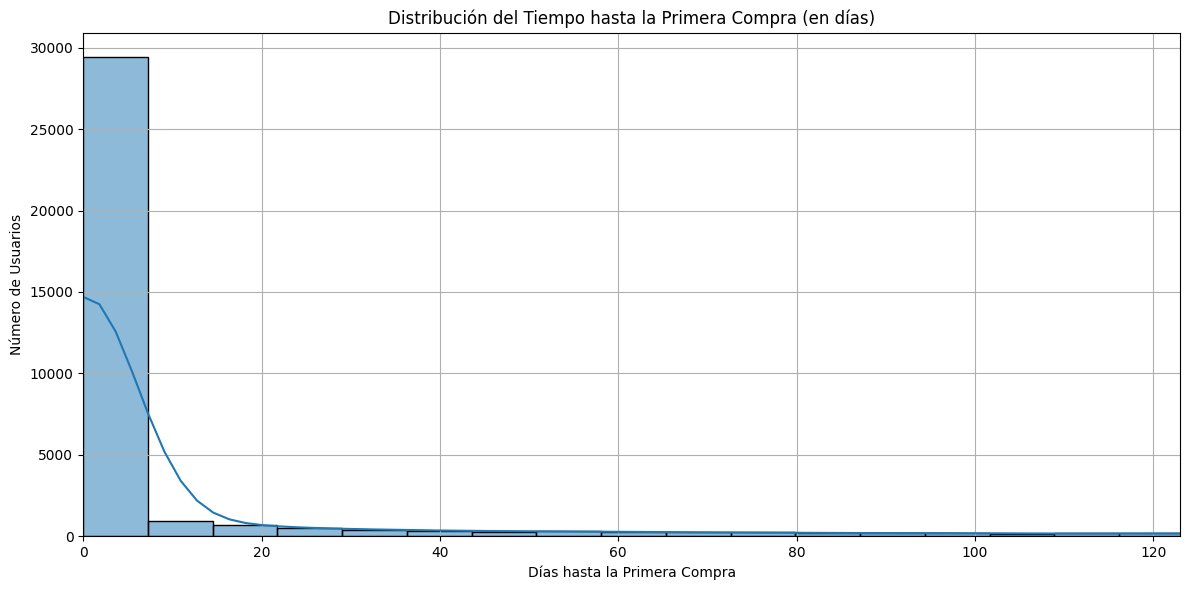

In [55]:
# Gráfico de histograma del tiempo hasta la primera compra
plt.figure(figsize=(12, 6))
sns.histplot(conversion_data['time_to_first_order_days'], bins=50, kde=True)
plt.title('Distribución del Tiempo hasta la Primera Compra (en días)')
plt.xlabel('Días hasta la Primera Compra')
plt.ylabel('Número de Usuarios')
plt.xlim(0, conversion_data['time_to_first_order_days'].quantile(0.95)) # Limitar a un percentil alto para mejor visualización
plt.grid(True)
plt.tight_layout()
plt.show()

#### Nota: Barra muy alta en 0 días: confirma que gran parte de usuarios compra de inmediato o el mismo día.
- Cola larga de la distribución se extiende mucho hacia la derecha.
- Barras mucho más pequeñas a la derecha
- Representan usuarios que tardan días, semanas o incluso meses en realizar su primera compra.

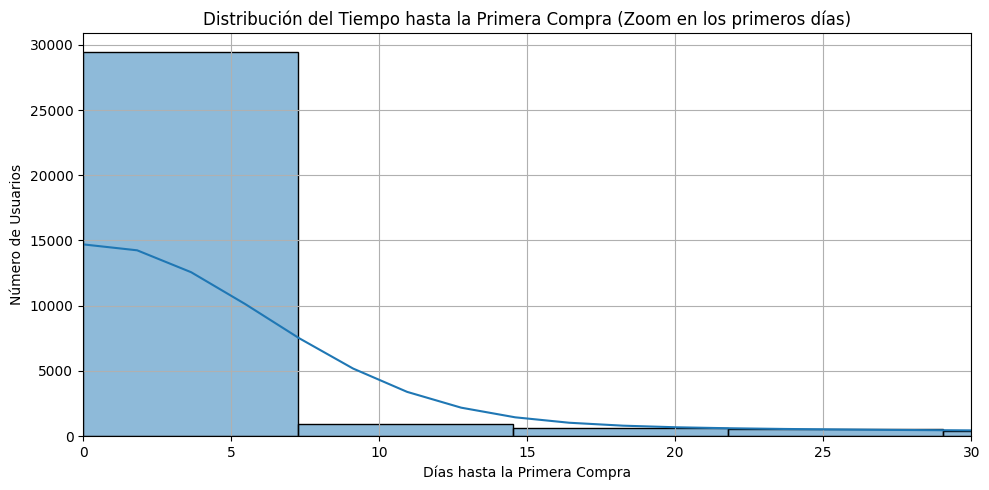

In [56]:
# Zoom en los primeros días
plt.figure(figsize=(10, 5))
sns.histplot(conversion_data['time_to_first_order_days'], bins=50, kde=True)
plt.title('Distribución del Tiempo hasta la Primera Compra (Zoom en los primeros días)')
plt.xlabel('Días hasta la Primera Compra')
plt.ylabel('Número de Usuarios')
plt.xlim(0, 30) # Zoom en el primer mes
plt.grid(True)
plt.tight_layout()
plt.show()

#### Nota: Muestra un "zoom" de los primeros 30 días
- Notable mayoría de conversiones en en los primeros 7 días
- Segmento muy grande sucede el día 0.

#### Observaciones generales sobre el Tiempo hasta la Primera Compra:
1 - Conversión rápida domina:
- Showz posee un perfil de conversión muy rápido.
- La mitad de los usuarios que compran lo hacen el mismo día de su primer visita
- 75% lo hace en 2 días o menos.
- El sitio es muy efectivo para capturar la intención de compra inicial.

2 - Marketing - UX:
- Campañas de conversión inmediata como ofertas por tiempo limitado o en la primera visita pudiesen ser muy efectivas.
- Para los que no compran de inmediato estrategias de retargeting deben ser rápidas en primeros días.
- Experiencia de Usuario (UX) debe ser muy fluido y fácil en la primera visita.
- Cualquier fricción disuade este gran cohorte de compradores rápidos.
- UI: La interfaz debe ser intuitiva enespecial para registro y checkout.

3 - Segmentación: 
- Un gran grupo de compradores impulsivos/rápidos y uno más pequeño que necesita más tiempo para decidir.
- Estrategias de marketing y remarketing deben segmentarse en función de esto
- Para el grupo de conversión lenta se necesitan más puntos de contacto, nutrición de contenido y recordatorios de carritos abandonados.

4 - Calidad del Tráfico: 
- Alta tasa de conversión el día "Cero" indica se atrae tráfico de alta calidad con intención de compra ya formada.
- Esto pudiese ser gracias a estrategias de SEO, campañas de pago por clic muy segmentadas o referencias directas.

### 2.2.2 ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [57]:
# Contar pedidos por usuario
orders_per_user = order.groupby('uid')['buy_ts'].count().reset_index()
orders_per_user.columns = ['uid', 'total_orders']

print(orders_per_user.head())


                uid  total_orders
0   313578113262317             1
1  1575281904278712             2
2  2429014661409475             1
3  2464366381792757             1
4  2551852515556206             2


In [58]:
# Estadísticas descriptivas
print(orders_per_user['total_orders'].describe().round(2))

count    36523.00
mean         1.38
std          3.45
min          1.00
25%          1.00
50%          1.00
75%          1.00
max        239.00
Name: total_orders, dtype: float64


#### Observaciones estadísticas:
- count (36,523): Número de usuarios que han hecho al menos una compra. Count igual al del análisis de tiempo hasta la primera compra (consistencia).
- min (1.00): Todos en este conjunto han realizado al menos 1 pedido.
- 25% (1.00): Usuarios ha realizado solo 1 pedido.
- 50% (1.00): Mediana de 1.00. La mitad de los usuarios que han comprado en Showz han realizado solo un pedido. En Showz dominan compradores de una sola vez.
- 75% (1.00): 75% de usuarios ha realizado solo 1 pedido. Refuerza lo anterior, la gran mayoría de compradores son de una sola transacción.
- mean (1.38): Media de 1.38 pedidos por usuario es más alta que la mediana de 1. Aunado al "max" indica una cola larga de usuarios o súpercompradores con una gran cantidad de pedidos y esto arrastra la media hacia arriba.
- std (3.45): La desviación estándar es relativamente alta (sesgo a la derecha).
    - Muchos usuarios en el extremo inferior (1 pedido)
    - Pocos en el extremo superior (muchos pedidos).
- max (239.00): Uno o pocos usuarios han hecho hasta 239 pedidos. Clientes valiosos que representan un segmento muy pequeño pero de muy alta actividad.

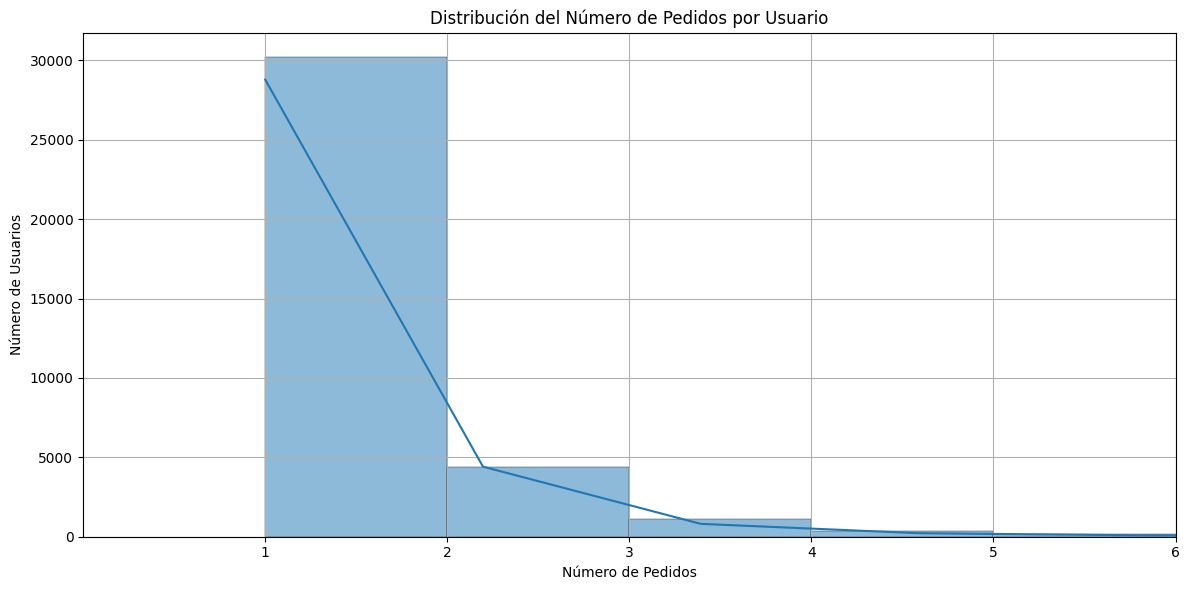

In [59]:
# Gráfico de histograma / # pedidos por usuario
plt.figure(figsize=(12, 6))
sns.histplot(orders_per_user['total_orders'], bins=range(1, orders_per_user['total_orders'].max() + 2), kde=True)
plt.title('Distribución del Número de Pedidos por Usuario')
plt.xlabel('Número de Pedidos')
plt.ylabel('Número de Usuarios')
plt.xticks(range(1, orders_per_user['total_orders'].max() + 1)) # Asegura que las etiquetas sean enteros
plt.xlim(0, orders_per_user['total_orders'].quantile(0.99) + 1) # Limitar a un percentil alto para mejor visualización
plt.grid(True)
plt.tight_layout()
plt.show()

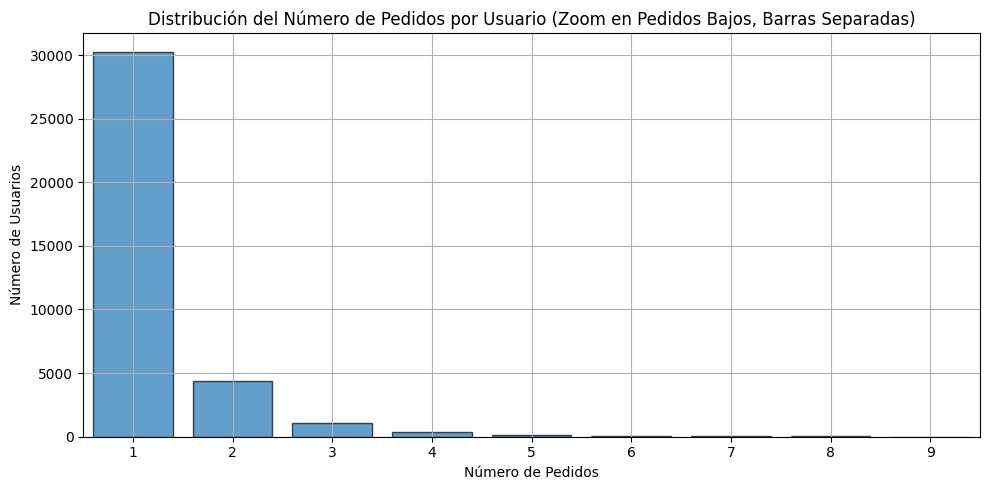

In [60]:
# Zoom en los primeros pedidos (con barras separadas)
plt.figure(figsize=(10, 5))

# Usar plt.hist - rwidth (Definir bins para que cada número entero sea el centro de una barra)
bins = [x - 0.5 for x in range(1, 10 + 1)] # Bins para 1, 2, ... 9 pedidos, incluyendo los bordes

plt.hist(
    orders_per_user['total_orders'],
    bins=bins,
    rwidth=0.8,  # plt.hist
    edgecolor='black', # Bordes de barras visibles
    alpha=0.7
)
plt.title('Distribución del Número de Pedidos por Usuario (Zoom en Pedidos Bajos, Barras Separadas)')
plt.xlabel('Número de Pedidos')
plt.ylabel('Número de Usuarios')
plt.xticks(range(1, 10)) # Asegura ticks en números enteros
plt.xlim(0.5, 9.5)       # Ajusta límites - centrar barras en ticks y dar espacio
plt.grid(True)
plt.tight_layout()
plt.show()

#### Interpretación histogramas:
- Primer histograma:
    -  muestra una barra muy alta en "1 pedido" que domina el gráfico y luego cae drásticamente a 2, 3 y 4 pedidos, y así sucesivamente.
    - La cola se extiende y es casi invisible por la escala.
- Segundo histograma "Zoom en Pedidos Bajos":
    - La gran mayoría de usuarios se concentran en 1 pedido
    - Número mucho menor de usuarios haciendo 2
    - Luego de forma progresiva para 3 o más.

### Conclusiones de negocio sobre frecuencia de compra:
1 - Dominio de Compradores Únicos: 
- La mayoría de usuarios que hacen una compra lo hacen solo una vez.
- La repetición de compra es un área de oportunidad significativa.

2 - Identificación de "Power Users": 
- Un pequeño segmento de usuarios es muy leal y realiza múltiples o cientos de pedidos.
- Son críticos para el negocio y deben ser identificados, comprendidos y potencialmente recompensados e incentivados para fidelizarlos.

3 - Desafío y Oportunidad de Retención: 
- Principal desafío para Showz es convertir a los compradores únicos en clientes recurrentes.
- Estrategias de retención, programas de lealtad, comunicación post-compra y campañas de remarketing dirigidas a clientes de una sola compra.

4 - Primera experiencia: 
- Muchos usuarios compran solo una vez
- La experiencia de la primera compra debe ser impecable para maximizar las posibilidades de una segunda.
- Aunque la conversión inicial es rápida para muchos, la retención de los compradores a través de compras repetidas es un área que necesita atención.



<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Esta última sección te apoyaste muy bien de las gráficas para complementar mejor el mensaje que se quiere compartir en el análisis.
</div>

### 2.2.3 ¿Cuál es el tamaño promedio de compra? (Valor Promedio de Pedido - AOV)
- Valor promedio de las transacciones para:
    - Evaluar la rentabilidad de cada venta
    - Identificar oportunidades de optimización.
---
- Un AOV más alto puede indicar éxito en estrategias de:
    - Venta cruzada (cross-selling)
    - Venta adicional (up-selling)

O que los productos de mayor valor están resonando con los clientes.

In [61]:
# Valor promedio de pedido (AOV) global
aov_global = order['revenue'].mean()
print(f"Valor Promedio de Pedido (AOV) global: ${aov_global:.2f}")

Valor Promedio de Pedido (AOV) global: $5.00


In [62]:
# Estadísticas del valor de cada pedido (revenue)
print(order['revenue'].describe().round(2))

count    50415.00
mean         5.00
std         21.82
min          0.00
25%          1.22
50%          2.50
75%          4.89
max       2633.28
Name: revenue, dtype: float64


#### Interpretación estadística:
- count (50 415.00): Número total de pedidos registrados en el DataFrame order. Cantidad considerable de transacciones.
- mean (5.00): Promedio de pedido es de  USD 5. Este es el AOV global.
- min (0.00): Al menos hay un pedido de USD 0.00. Podría ser un error, transacción de prueba, o pedido gratis por una promoción. Definir si deben excluirse.
- 25% (1.22): 25% de los pedidos tienen un valor de USD 1.22 o menos. Es una cuarta parte de las transacciones y son de muy bajo valor.
- 50% (2.50): Mediana del valor de los pedidos es de USD 2.50. Significativamente más bajo que la media de USD 5.00.
- 75% (4.89): 75% de los pedidos tienen un valor de USD 4.89 o menos.
- max (2633.28): El valor máximo de un pedido es de USD 2 633.28. Extremadamente alto en comparación con la media y la mediana.

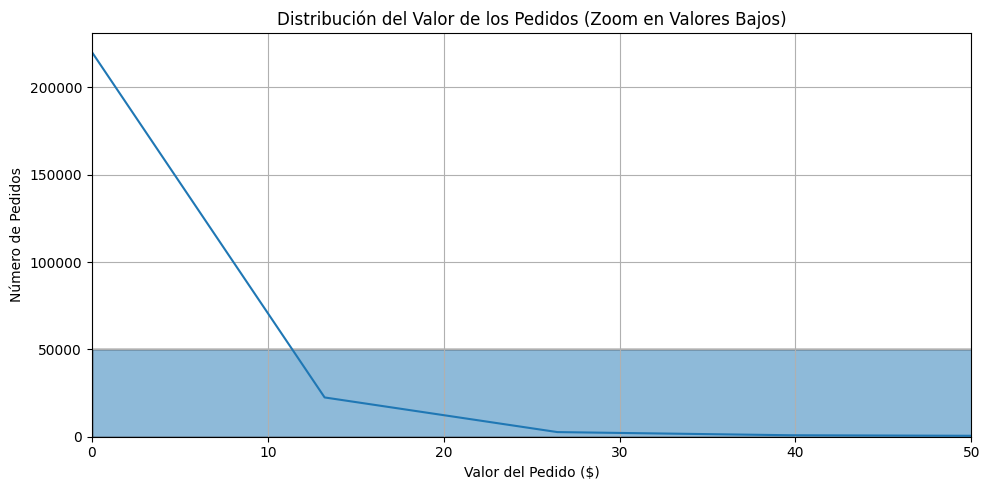

In [63]:
# Opcional: Histograma con el zoom original en los valores más bajos para mayor detalle
# Este sigue siendo útil para ver la forma exacta de la distribución en el segmento más común
plt.figure(figsize=(10, 5))
sns.histplot(order['revenue'], bins=50, kde=True)
plt.title('Distribución del Valor de los Pedidos (Zoom en Valores Bajos)')
plt.xlabel('Valor del Pedido ($)')
plt.ylabel('Número de Pedidos')
plt.xlim(0, 50) # Zoom en pedidos de hasta 50$
plt.grid(True)
plt.tight_layout()
plt.show()

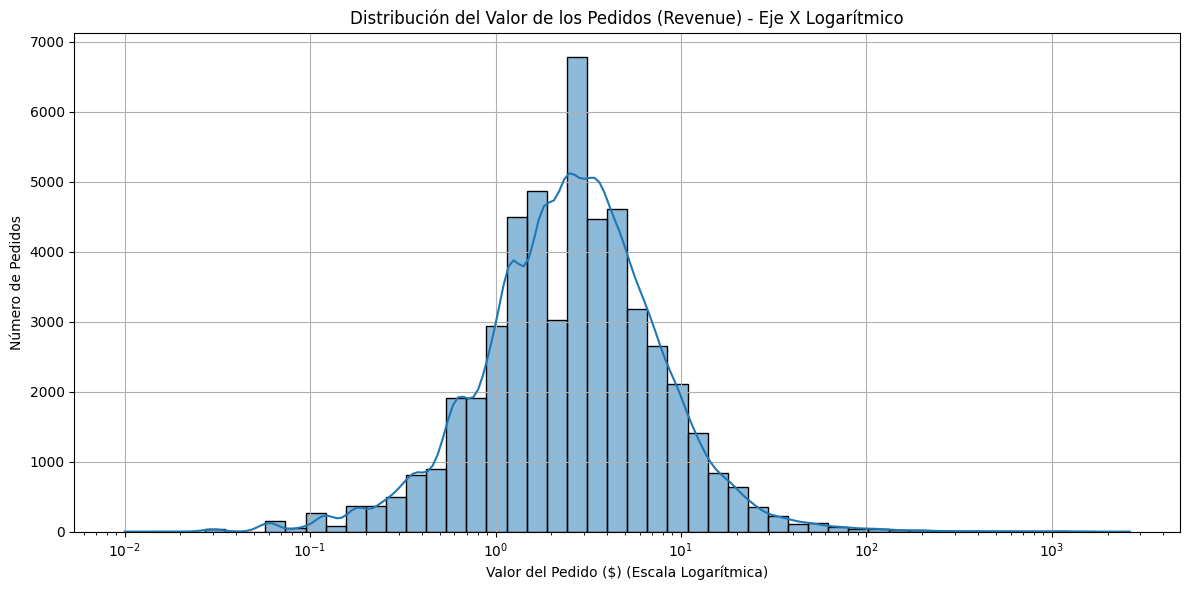

In [64]:
filtered_revenue = order[order['revenue'] > 0]['revenue']

plt.figure(figsize=(12, 6))
sns.histplot(filtered_revenue, bins=50, kde=True, log_scale=True)
plt.title('Distribución del Valor de los Pedidos (Revenue) - Eje X Logarítmico')
plt.xlabel('Valor del Pedido ($) (Escala Logarítmica)')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.tight_layout()
plt.show()


### Conclusión del análisis de la distribución del valor de los pedidos (Revenue)
1 - El valor promedio de pedido (AOV) global es de USD 5.00
- La mediana es significativamente más baja (USD 2.50)
- Distribución sesgada a la derecha
- Mayoría de las transacciones son de bajo valor (75% de los pedidos tienen un valor de USD 4.89 o menos).

2 - Gráfico "Zoom en Valores Bajos"
- Concentración. Gran número de pedidos con valores cercanos a cero y rápida disminución a medida que el valor del pedido aumenta.
- Se comprende el comportamiento de la mayoría de compradores que realizan transacciones pequeñas.
- Existen pedidos con un valor de USD 0.00 (requiere investigación adicional / promociones o errores).

3 - Gráfico con 'Eje X Logarítmico' 
- Distribución completa desde los centavos 10(−2) hasta los miles de dólares 10(+3)
- La distribución se asemeja a una log-normal y confirma el pico de concentración en valores bajos (entre USD1.00 y USD3.00)
- Muestra cola larga de la distribución, aunque menos frecuente en pedidos de valor más alto, hasta un máximo de USD 2633.28.
---
Showz tiene un alto volumen de transacciones de bajo valor, que a su vez son la mayor parte de su actividad de ventas. Pero una porción menor de clientes contribuye con pedidos de mucho mayor valor (vital para el AOV global). Debemos optimizar ambos extremos: 
- Facilitar y maximizar las compras pequeñas y frecuentes
- Identificar e incentivar oportunidades para aumentar el valor de las transacciones en los clientes de mayor gasto potencial.

### 2.2.4 ¿Cuánto dinero traen? (LTV)

#### LTV (Life Time Value): 
- Métrica que estima los ingresos totales que un cliente generará para el negocio durante toda su relación. 
Combinar LTV con Costo de Adquisición de Cliente (CAC) nos da una idea clara de la rentabilidad a largo plazo de los clientes. Para calcular el LTV necesitamos considerar los ingresos generados por cada cliente a lo largo del tiempo.

In [65]:
# Convertir columnas a datetime
visit['start_ts'] = pd.to_datetime(visit['start_ts'])
visit['end_ts'] = pd.to_datetime(visit['end_ts'])
order['buy_ts'] = pd.to_datetime(order['buy_ts'])
cost['dt'] = pd.to_datetime(cost['dt'])

In [66]:
# Mes primera compra (cohorte de adquisición) por usuario
first_order_date = order.groupby('uid')['buy_ts'].min().reset_index()
first_order_date.columns = ['uid', 'first_buy_ts']
first_order_date['acquisition_month'] = first_order_date['first_buy_ts'].dt.to_period('M')

In [67]:
# Extrae mes de compra por pedido
order['order_month'] = order['buy_ts'].dt.to_period('M')

In [68]:
# Fusionar DF´s order y first_order_date - asegurar que cada pedido se asocie a cohorte de adquisición de su cliente
orders_with_cohort = pd.merge(order, first_order_date[['uid', 'acquisition_month']], on='uid')

In [69]:
# Ingresos por cohorte y mes desde la adquisición
# Calcula la "vida" del cliente en meses (desde la adquisición hasta la compra actual)
orders_with_cohort['cohort_lifetime'] = (orders_with_cohort['order_month'] - orders_with_cohort['acquisition_month']).apply(lambda x: x.n)

# Agrupa ingresos por cohorte de adquisición y LTV del cliente
cohort_revenue = orders_with_cohort.groupby(['acquisition_month', 'cohort_lifetime'])['revenue'].sum().reset_index()

# Número de usuarios en cada cohorte de adquisición
cohort_sizes = orders_with_cohort.groupby('acquisition_month')['uid'].nunique().reset_index()
cohort_sizes.columns = ['acquisition_month', 'n_buyers']

In [70]:
# Fusionar ingresos con tamaño del cohorte
report = pd.merge(cohort_revenue, cohort_sizes, on='acquisition_month')

In [71]:
# Calcular LTV (ingresos por cliente en cada cohorte_lifetime)
report['ltv'] = report['revenue'] / report['n_buyers']

In [72]:
# Convertir acquisition_month a Timestamp antes del pivot
# Asegura que el índice del pivot_table sea datetime para sns.lineplot
report['acquisition_month'] = report['acquisition_month'].dt.to_timestamp()

In [73]:
# Pivotar tabla - visualizar LTV acumulado
ltv_pivot = report.pivot_table(
    index='acquisition_month',
    columns='cohort_lifetime',
    values='ltv'
)

# Calcular LTV acumulado
cumulative_ltv = ltv_pivot.cumsum(axis=1)

# Tabla LTV acumulado por cohorte (se usa fillna y (" ") para convertir NAN por espacios vacíos
cumulative_ltv.head(13).round(2).fillna("")

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
acquisition_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cómo recomendación cuando generes resultados utilizando pivot_table es que este mismo lo muestres en una gráfica tipo mapa de calor para que la comparación o análisis del resultado sea mucho más visual y fácil de comprender.
</div>

### Resumen del LTV acumulado de Showz por cohorte de adquisición:
1 - Ingreso promedio total que cada grupo de clientes (basado en su mes de primera compra) ha generado hasta un determinado mes de su "vida" como cliente.
- LTV Inicial (mes 0): En su mes de adquisición los clientes aportan un LTV promedio de mínimo USD 3.42 y máximo USD 6.01 (contribución promedio del cliente en primer mes).
- Crecimiento LTV: El LTV crece en todas las cohortes con el tiempo (Ejemplo: La cohorte de junio 2017 inicia con USD 4.72 y crece hasta USD 11.88 después de 11 meses).
- Cohorte destacada (septiembre 2017): Rendimiento notable, LTV acumulado a 3 meses de USD 11.26, y a 4 meses de USD 11.66. Más alto de los cohortes (clientes valiosos)
- Cohortes más recientes del 2018: Más bajos en sus primeros meses especial a finales de 2017 y principios de 2018. Junio 2018 es el más bajo con USD 3.42 en su primer mes).

El valor de los clientes se acumula a lo largo de su relación con el negocio, destacando cohorte "septiembre 2017" como la de mayor rendimiento LTV y sugiriendo monitorear el desempeño de las cohortes más recientes si siguen patrones similares o hay cambios en el valor a largo plazo de los nuevos clientes.

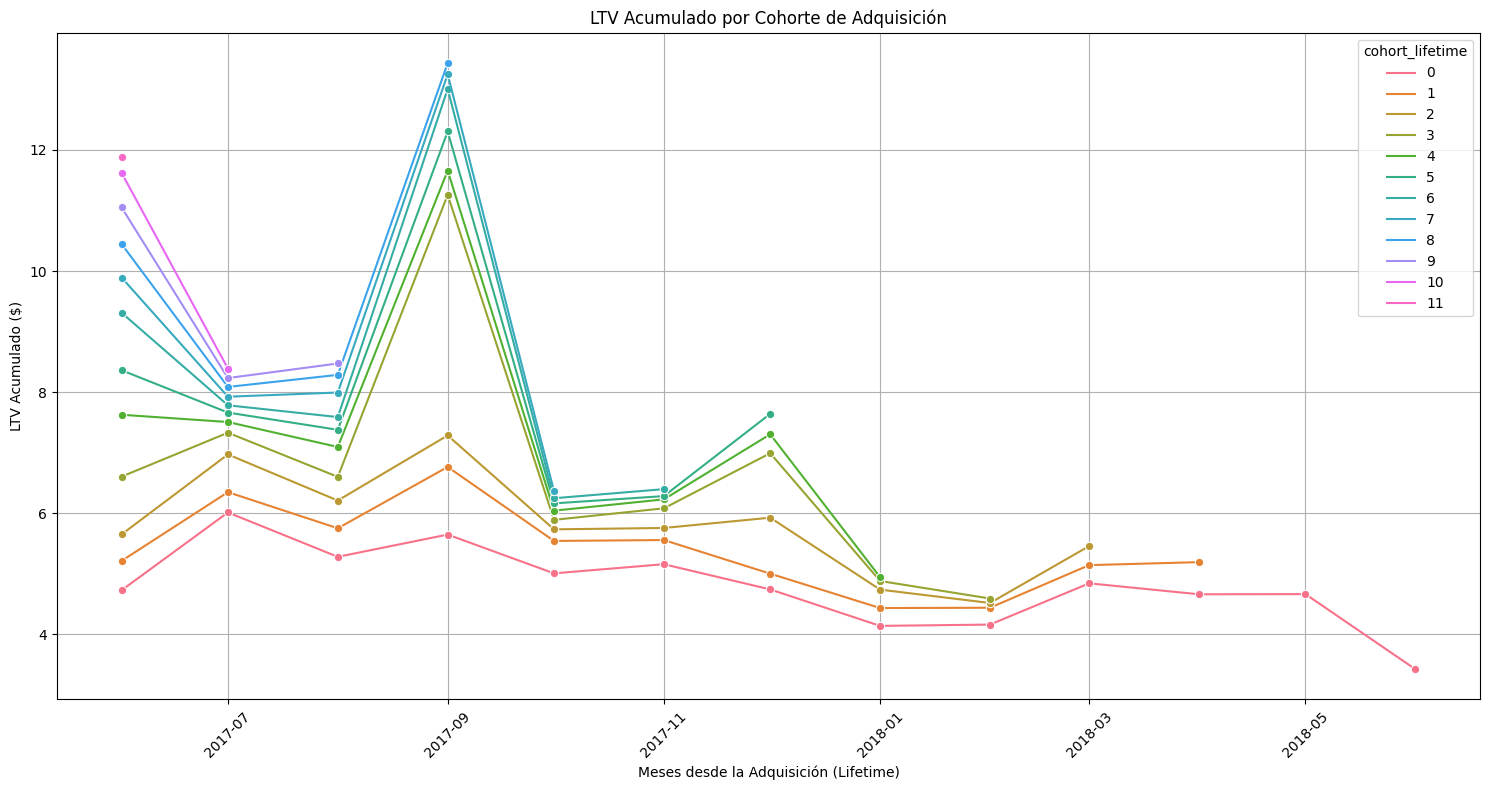

In [74]:
# Gráfico LTV
plt.figure(figsize=(15, 8))
sns.lineplot(data=cumulative_ltv, dashes=False, marker='o')
plt.title('LTV Acumulado por Cohorte de Adquisición')
plt.xlabel('Meses desde la Adquisición (Lifetime)')
plt.ylabel('LTV Acumulado ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Interpretación del Gráfico "LTV Acumulado por Cohorte de Adquisición":
1 - Crecimiento del LTV con el Tiempo:
- Es normal que todas las líneas asciendan, pues los clientes con el tiempo generan más ingresos (LTV acumulado).
- La pendiente tiende a disminuir a medida que pasa el tiempo.
    - La mayor parte del LTV se acumula en los primeros meses de vida de un cliente
    - Y aunque siguen contribuyendo su ritmo disminuye.
---
2- Rendimiento destacado (Cohorte Septiembre 2017):
- Es la cohorte líder en LTV acumulado. Desde el mes 0, su línea está por encima de la mayoría (mes 0: USD5.64 y mes 8: USD 13.44)
- Los clientes adquiridos en septiembre de 2017 son en promedio los más valiosos.

---
3 - Variabilidad entre Cohortes:
- Clara diferencia en el LTV inicial: Mes 0 julio 2017 (USD 6) y junio 2018 (USD 3.42)
- Las líneas no se superponen perfectamente. Valor del clientes varía según el mes en que fueron adquiridos por factores de:
    - Campañas de marketing
    - Estacionalidad
    - Cambios en el producto o cambios en el perfil del cliente.
---
4 - Cortes más recientes:
- No concluir sobre el rendimiento a largo plazo de las cohortes más recientes. Su LTV sigue creciendo en el tiempo y se recopilan más datos.
---
5- Implicaciones de Negocio:
- Cohorte de septiembre 2017 es ejemplo de éxito. Investigar por qué su alto LTV y replicar:
    - Campañas específicas
    - Tipo de producto vendido
    - Fuente de adquisición
- Monitoreo del valor del cliente: Si las líneas de cohortes recientes muestran un patrón a la baja puede ser señal de alerta.
- Estrategias de Retención: Ver puntos de inflexión donde la contribución del cliente disminuye (aplicar estrategias de retención o re-engagement).
- Optimización de la adquisición: comparar LTV con CAC por cohorte y ver qué meses de adquisición generan los clientes más rentables.

In [75]:
# LTV promedio general (sumando LTV de las cohortes y promediando)
average_ltv_per_month = cumulative_ltv.mean()

# LTV acumulado promedio por mes desde la adquisición (mediante las cohortes)
print(average_ltv_per_month.round(2))
print(f"\nLTV promedio general después de 12 meses (o el máximo disponible): ${average_ltv_per_month.iloc[-1]:.2f}")

cohort_lifetime
0      4.80
1      5.40
2      5.82
3      6.69
4      7.30
5      7.97
6      8.39
7      9.08
8     10.06
9      9.25
10    10.00
11    11.88
dtype: float64

LTV promedio general después de 12 meses (o el máximo disponible): $11.88


#### Análisis del LTV promedio por mes de vida (cohort_lifetime)
1 - Interpretación de esta tabla:
- Mes 0 (adquisición): Un cliente genera 4.80 en ingresos durante el mismo mes en que fue adquirido (su primer compra y cualquier otra compra en ese mes). 
- Mes 1: USD Un cliente ha generado USD 5.40 en ingresos acumulados al final del primer mes completo después de su adquisición (el mes de adquisición más el mes siguiente).
- Crecimiento Sostenido: Podemos ver un crecimiento constante en el LTV acumulado a medida que pasa el tiempo.
- De USD 4.80 a USD 5.40 (Mes 0 al Mes 1) hay un incremento de USD 0.60.
---
2- Disminución en el Mes 9 (cohort_lifetime 9):
- USD 9.25, ligera caída. Pudiese porque algunas cohortes más antiguas y de alto rendimiento no tengan datos hasta ese cohorte o que cohortes más recientes con menor rendimiento comienzan a promediar los valores.
- Los valores altos en los primeros meses pudiesen no tener datos para más allá del 4 y al promediar la influencia de cohortes con menor LTV pudiesen reducir el promedio general.
---
3 - El LTV sigue creciendo significativamente en los primeros meses, y luego el crecimiento se vuelve más gradual pero constante.
- Mes 11 (Después de 12 meses): USD 11.88
- LTV promedio general después de 12 meses (o el máximo disponible) es USD 11.88. Un cliente de Showz genera USD 11.88 en ingresos acumulados durante los primeros 12 meses desde su adquisición.
---
4 - Conclusión Consolidada del LTV:
- El análisis del LTV revela patrones de contribución de ingresos a lo largo del tiempo por parte de las cohortes de clientes.
- Las estadísticas muestran que el LTV promedio de un cliente de Showz es de USD 4.80 en el mes de su adquisición (Mes 0).
- Este valor crece de manera constante, alcanzando USD 7.30 en el Mes 4, y finalmente llega a un LTV acumulado promedio de USD 11.88 después de 12 meses desde su adquisición.

## 2.3 Marketing:

### 2.3.1 ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo) 

In [76]:
# Preprocesar 'cost'
cost['dt'] = pd.to_datetime(cost['dt'])
cost['month'] = cost['dt'].dt.to_period('M')

# Gasto total por fuente de marketing
total_spend_by_source = cost.groupby('source_id')['costs'].sum().reset_index()

print(total_spend_by_source)

   source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49


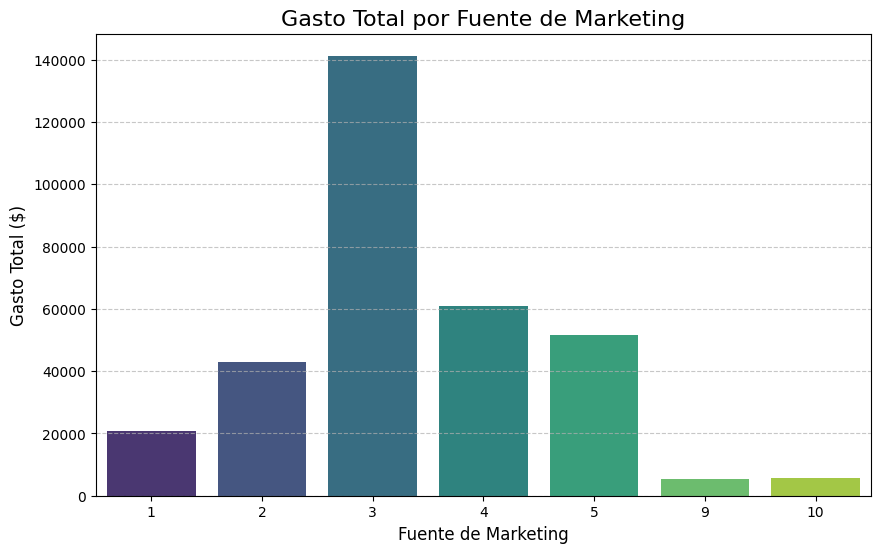

In [77]:
# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='source_id', y='costs', data=total_spend_by_source, palette='viridis')
plt.title('Gasto Total por Fuente de Marketing', fontsize=16)
plt.xlabel('Fuente de Marketing', fontsize=12)
plt.ylabel('Gasto Total ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Gasto total por fuente de marketing
- Fuente 3: USD 141 321,63 (Mayor inversión en presupuesto de marketing)
    - Fuente 4: USD 61 073,60
    - Fuente 5 : USD 51 757,10
    - Fuente 2: USD 42 806,04
    - Fuente 1: USD 20 833,27
---
- Fuentes de Gasto Bajo:
    - Fuente 9 (USD 5 517,49)
    - Fuente 10 (USD 5 822,49)
    - Distribución del presupuesto muy irregular o fluctuante, concentrado en la Fuente 3 que casi duplica la segunda fuente más grande (4).
    - Sugiere una estrategia donde se apuesta fuertemente por unos pocos canales.

### 2.3.2 ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [78]:
# Fuente de adquisición para cada usuario en visit (cada usuario (uid) encontrar la fuente de primera visita)
# Ordenar visit por uid y start_ts para asegurar que 'first' sea realmente la primera.
visits_sorted = visit.sort_values(by=['uid', 'start_ts'])
first_visit_source = visits_sorted.groupby('uid').agg(
    acquisition_month=('start_ts', 'min'), # mes primer visita
    acquisition_source_id=('source_id', 'first') # source_id primer visita
).reset_index()

# Extraer mes de adquisición para unirlo con los gastos mensuales de marketing
first_visit_source['acquisition_month'] = first_visit_source['acquisition_month'].dt.to_period('M')

In [79]:
# Unir fuente de adquisición a pedidos (Sabiendo qué source_id trajo a cada uid, lo unimos a la tabla de pedidos)
# Que cada 'uid' en 'order' tenga su 'acquisition_source_id'
order_with_source = order.merge(first_visit_source[['uid', 'acquisition_source_id']], on='uid', how='left')

# Los uid´s en "order" que no están en "visit" el "acquisition_source_id" será NaN.
# Asumir que vienen de fuente desconocida o filtrarlos.
# Este análisis se enfoca en los que tienen source_id conocida.
order_with_source = order_with_source.dropna(subset=['acquisition_source_id'])
# Convertir acquisition_source_id a int (source_id son enteros)
order_with_source['acquisition_source_id'] = order_with_source['acquisition_source_id'].astype(int)

In [80]:
# Número de clientes únicos adquiridos por mes y fuente (contar "uid" únicos de primer compran en ese mes por fuente)
# Mediante la tabla "first_visit_source" y su "acquisition_month"
monthly_acquisitions = first_visit_source.groupby(['acquisition_month', 'acquisition_source_id'])['uid'].nunique().reset_index()
monthly_acquisitions.columns = ['month', 'source_id', 'acquired_users']

In [81]:
# Unir gastos y adquisiciones "mensuales"
monthly_costs = cost.groupby(['month', 'source_id'])['costs'].sum().reset_index() # Recordar que es 'costs'

marketing_performance = pd.merge(monthly_costs, monthly_acquisitions, on=['month', 'source_id'], how='left')

# Complertar NaN en "acquired_users" con 0 (por si la fuente tuvo gasto pero no adquirió usuario ese mes)
marketing_performance['acquired_users'] = marketing_performance['acquired_users'].fillna(0)

In [82]:
# Calcular CAC promedio total por fuente
# Agrupar por source_id (sumar costos totales y usuarios totales adquiridos)
cac_by_source = marketing_performance.groupby('source_id').agg(
    total_costs=('costs', 'sum'),
    total_acquired_users=('acquired_users', 'sum')
).reset_index()

# Calcular CAC: total_costs / total_acquired_users (división por cero por si una fuente no adquirió usuarios pero tuvo costos)
cac_by_source['cac'] = cac_by_source.apply(
    lambda row: row['total_costs'] / row['total_acquired_users'] if row['total_acquired_users'] > 0 else 0,
    axis=1
)

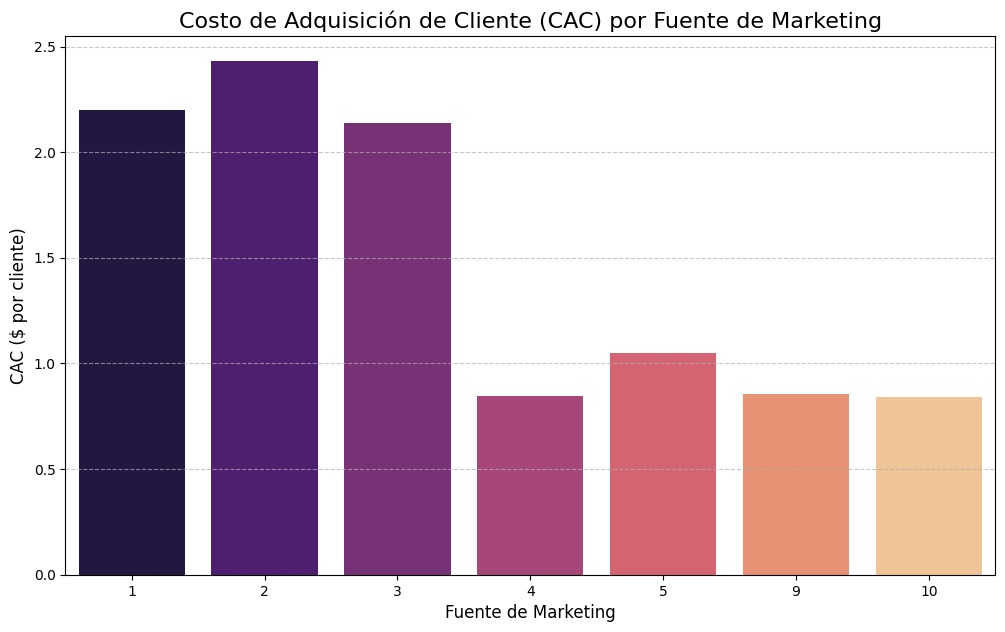

   source_id  total_costs  total_acquired_users       cac
0          1     20833.27                  9469  2.200155
1          2     42806.04                 17616  2.429952
2          3    141321.63                 66116  2.137480
3          4     61073.60                 72346  0.844188
4          5     51757.10                 49237  1.051183
5          9      5517.49                  6448  0.855690
6         10      5822.49                  6903  0.843472


In [83]:
# Gráfico de barras CAC por fuente
plt.figure(figsize=(12, 7))
# Ordenar barras por CAC de mayor a menor
sns.barplot(x='source_id', y='cac', data=cac_by_source.sort_values(by='cac', ascending=False), palette='magma')
plt.title('Costo de Adquisición de Cliente (CAC) por Fuente de Marketing', fontsize=16)
plt.xlabel('Fuente de Marketing', fontsize=12)
plt.ylabel('CAC ($ por cliente)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Valores de CAC por Fuente de Marketing
print(cac_by_source)

#### Gráfico de CAC (Costo de Adquisición de Cliente) y tabla de valores
- CAC más alto: La fuente 2 es la más cara (USD 2.43 por cliente).
- CAC más bajo: ecto. La fuente 10 es la más baja (USD 0.84) seguida de la 4 (USD 0.84) y la 9 (USD 0.86). Más eficientes en costo de adquisición
- Fuente 3: En esta se invirtió USD 141 321,63) y tiene un CAC de USD 2.14 como tercero más alto después de Fuente 2 y 1.
---
##### Implicaciones de tus observaciones:
- Eficiencia vs. Gasto:
    - La Fuente 3 de mayor gasto
    - Y tiene un CAC relativamente alto.
    - Aunque atrae muchos clientes no lo hace de la manera más económica por cliente individual.
    - Es una señal de alerta y requiere justificación
    - ¿Vale la pena ese CAC más alto porque los clientes de la Fuente 3 son mucho más valiosos a largo plazo (LTV)?
    - O ¿traen un volumen insustituible? <br><br>

- Oportunidades en fuentes de bajo CAC:
    - Fuente 10, 4 y 9 con CAC muy bajo porque son muy eficientes.
    - No son las que más gasto reciben
    - Su bajo costo de adquisición las hace candidatas a explorar un posible aumento de inversión
    - Siempre y cuando el volumen de clientes que puedan adquirir sea relevante.<br><br>

- Fuentes Problemáticas:
    - Fuente 2 con el CAC más alto:
    - Merece investigar si la empresa está pagando mucho por cada cliente de esta fuente.

### 2.3.3 ¿Cuán rentables eran las inversiones? (ROMI)

El ROMI se calcula con la fórmula:

$$ROMI = \frac{\text{Ingreso Total} - \text{Gasto Total}}{\text{Gasto Total}} \times 100$$

In [84]:
# Ingreso total (revenue) por cada fuente de adquisición
# Agrupar DF´s "order_with_source" por fuente de adquisición y sumar "revenue"
revenue_by_source = order_with_source.groupby('acquisition_source_id')['revenue'].sum().reset_index()

# Renombrar columna "acquisition_source_id" a "source_id" para facilitar merge
revenue_by_source.rename(columns={'acquisition_source_id': 'source_id'}, inplace=True)

In [85]:
# Obtener gasto total (costs) por cada fuente de marketing
# Recalcular para disponibilidad con "costs"
total_costs_by_source = cost.groupby('source_id')['costs'].sum().reset_index()

In [86]:
# Unir ingresos y costos por fuente
# Hacer "outer" merge para asegurar todas las fuentes (incluso si alguna no tuvo ingresos o costos)
romi_data = pd.merge(total_costs_by_source, revenue_by_source, on='source_id', how='outer')

# Rellena NaN con 0 (si hay después del merge)
romi_data['costs'] = romi_data['costs'].fillna(0)
romi_data['revenue'] = romi_data['revenue'].fillna(0)

In [87]:
# Calcular ROMI
# División por cero
# - Si gasto es 0 y hay ingresos, ROMI es infinito (bueno, pero poco realista en marketing)
# - Si gasto es 0 y los ingresos también son 0, ROMI es 0.
# - Si en todo caso se aplica la fórmula normal.
romi_data['romi'] = romi_data.apply(
    lambda row: (row['revenue'] - row['costs']) / row['costs'] if row['costs'] > 0 else (float('inf') if row['revenue'] > 0 else 0),
    axis=1
)

# ROMI a porcentaje (* 100)
romi_data['romi_percentage'] = romi_data['romi'] * 100

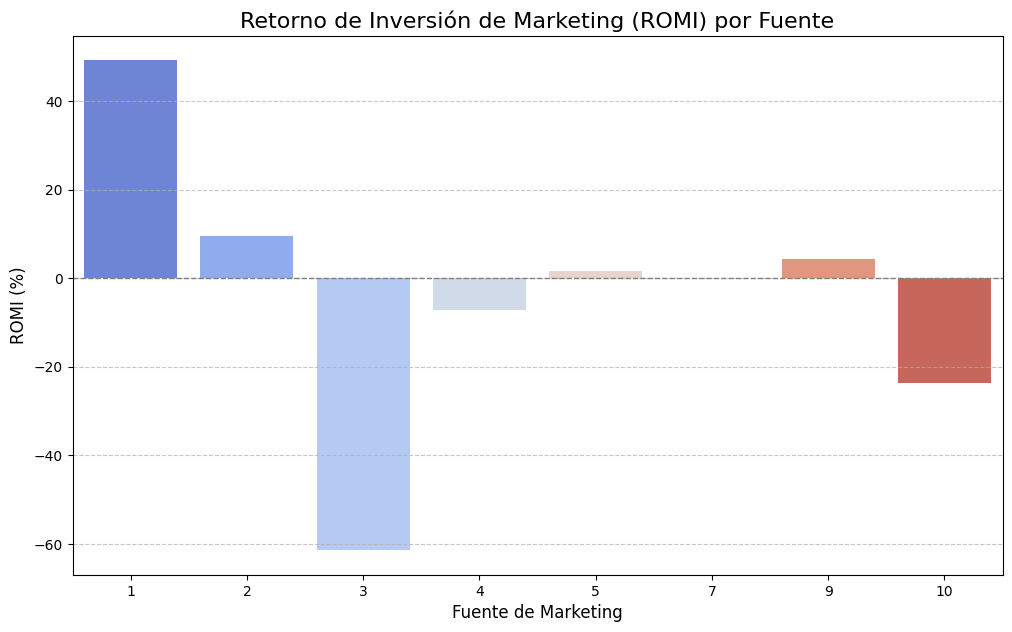


Valores de ROMI por Fuente de Marketing:
   source_id      costs   revenue  romi_percentage
0          1   20833.27  31090.55        49.235094
1          2   42806.04  46923.61         9.619133
2          3  141321.63  54511.24       -61.427532
3          4   61073.60  56696.83        -7.166386
4          5   51757.10  52624.02         1.674978
5          9    5517.49   5759.40         4.384421
6         10    5822.49   4450.33       -23.566550
7          7       0.00      1.22              inf


In [88]:
# Gráfico de barras - ROMI por fuente
plt.figure(figsize=(12, 7))

# Ordenar barras por % ROMI de mayor a menor
sns.barplot(x='source_id', y='romi_percentage', data=romi_data.sort_values(by='romi_percentage', ascending=False), palette='coolwarm')
plt.title('Retorno de Inversión de Marketing (ROMI) por Fuente', fontsize=16)
plt.xlabel('Fuente de Marketing', fontsize=12)
plt.ylabel('ROMI (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) # cuadrícula
plt.axhline(0, color='grey', linestyle='--', linewidth=1) # línea en 0% para ver ROMI - / +
plt.show()

print("\nValores de ROMI por Fuente de Marketing:")
print(romi_data[['source_id', 'costs', 'revenue', 'romi_percentage']])

#### Observaciones clave sobre el ROMI por fuente de marketing
1 - ROMI más alto:
    
    - Fuente 1:
        - Tiene el ROMI más alto, alcanzando un impresionante 49.24%.
        - Esto es un gran retorno: por cada dólar invertido se recuperan 1.49 dólares.
        - Tenía un CAC de 20 833,27 que no era el más bajo.
        - Demuestra que un CAC alto no significa un ROMI bajo si los clientes adquiridos por esa fuente generan muchos ingresos.

    - Fuente 2:
        - ROMI de 9.61 %.
        - Esta fuente tenía el CAC más alto.
        - Aunque es caro adquirir clientes de la Fuente 2 esos clientes son rentables.

    - Fuente 9:
        - ROMI positivo del 4.38 %
        - Esta tenía un CAC bajo
        - Se esperaba un bajo costo y buen retorno.

2 - ROMI más bajo:

    - Alarmas.
        - Fuente 3 con ROMI más bajo y pérdida masiva del -61,43%. Alarmante considerando la inversión de USD 140,000. Por dólar invertido pierden 61 centavos.
        - Fuente 10 la segunda con mayor pérdida, ROMI de -23.57%. Tenía un CAC bajo (baratos de adquirir pero no generan ingresos ni para cubrir ese bajo costo).
        - La Fuente 4 con ROMI negativo del -7.17%.

3 - Caso Especial: Fuente 7 (ROMI Infinito):
    
    - No tiene costos (= 0.00) pero tiene ingresos (revenue = 1.22)
    - Talvez porque no se registró ningún costo para esa fuente
    - O porque los costos son tan bajos que se redondean a cero. 
    - Si es una fuente orgánica o referencial sin inversión directa, un ROMI infinito es excelente
    - Pero se requiere verificar que no sea error en el registro de datos.
---
Conclusiones de marketing:
- Discrepancia crítica entre inversión (gasto), eficiencia de adquisición (CAC) y rentabilidad (ROMI):
    - Fuente 3: Mayor preocupación por nivel de inversión y genera las mayores pérdidas. Investigación urgente por carencia de revenue o costo desproporcionado.
    - Fuentes eficientes pero con ROMI mixto como la 10 (bajo CAC por no genera ingresos ni garantiza rentabilidad) Calidad del cliente y potencial son cruciales.

- Fuentes inesperadamente rentables:
    - Fuente 1 y 2: Sin ser las más eficientes en CAC resultan bastante rentables (cuesta más por cliente pero el cliente comprueba ser de mayor valor a largo plazo).
---
#### Se debe revaluar la inversión en la Fuente 3 y 10, a menos que haya otros factores como la adquisición de marca o el alcance, que justifiquen esas pérdidas. La Fuente 1 y 2 parecen ser más valiosas de lo que su CAC inicialmente sugería.

#### Observaciones clave sobre el ROMI por fuente de marketing
1 - ROMI más alto:
    
    - Fuente 1:
        - Tiene el ROMI más alto, alcanzando un impresionante 49.24%.
        - Esto es un gran retorno: por cada dólar invertido se recuperan 1.49 dólares.
        - Tenía un CAC de 20 833,27 que no era el más bajo.
        - Demuestra que un CAC alto no significa un ROMI bajo si los clientes adquiridos por esa fuente generan muchos ingresos.

    - Fuente 2:
        - ROMI de 9.61 %.
        - Esta fuente tenía el CAC más alto.
        - Aunque es caro adquirir clientes de la Fuente 2 esos clientes son rentables.

    - Fuente 9:
        - ROMI positivo del 4.38 %
        - Esta tenía un CAC bajo
        - Se esperaba un bajo costo y buen retorno.

2 - ROMI más bajo:

    - Alarmas.
        - Fuente 3 con ROMI más bajo y pérdida masiva del -61,43%. Alarmante considerando la inversión de USD 140,000. Por dólar invertido pierden 61 centavos.
        - Fuente 10 la segunda con mayor pérdida, ROMI de -23.57%. Tenía un CAC bajo (baratos de adquirir pero no generan ingresos ni para cubrir ese bajo costo).
        - La Fuente 4 con ROMI negativo del -7.17%.

3 - Caso Especial: Fuente 7 (ROMI Infinito):
    
    - No tiene costos (= 0.00) pero tiene ingresos (revenue = 1.22)
    - Talvez porque no se registró ningún costo para esa fuente
    - O porque los costos son tan bajos que se redondean a cero. 
    - Si es una fuente orgánica o referencial sin inversión directa, un ROMI infinito es excelente
    - Pero se requiere verificar que no sea error en el registro de datos.
---
Conclusiones de marketing:
- Discrepancia crítica entre inversión (gasto), eficiencia de adquisición (CAC) y rentabilidad (ROMI):
    - Fuente 3: Mayor preocupación por nivel de inversión y genera las mayores pérdidas. Investigación urgente por carencia de revenue o costo desproporcionado.
    - Fuentes eficientes pero con ROMI mixto como la 10 (bajo CAC por no genera ingresos ni garantiza rentabilidad) Calidad del cliente y potencial son cruciales.

- Fuentes inesperadamente rentables:
    - Fuente 1 y 2: Sin ser las más eficientes en CAC resultan bastante rentables (cuesta más por cliente pero el cliente comprueba ser de mayor valor a largo plazo).
---
#### Se debe revaluar la inversión en la Fuente 3 y 10, a menos que haya otros factores como la adquisición de marca o el alcance, que justifiquen esas pérdidas. La Fuente 1 y 2 parecen ser más valiosas de lo que su CAC inicialmente sugería.

## 2.3.4 ¿Difieren estas métricas para varios dispositivos, fuentes de anuncios o cómo cambian con el tiempo?

### 2.3.4.1 CAC y ROMI entre dispositivos

In [89]:
# Fuente de adquisición y device para cada usuario (Ordena visits por uid y start_ts para asegurar que 'first' sea realmente la primera visita)
visits_sorted = visit.sort_values(by=['uid', 'start_ts'])

# Agrupa por usuario para encontrar source_id, mes y dispositivo de primera visita
first_visit_info = visits_sorted.groupby('uid').agg(
    acquisition_month=('start_ts', 'min'),
    acquisition_source_id=('source_id', 'first'),
    acquisition_device=('device', 'first') # Captura dispositivo de primer visita
).reset_index()

first_visit_info['acquisition_month'] = first_visit_info['acquisition_month'].dt.to_period('M')

In [90]:
# Unir adquisición (fuente y dispositivo) a pedidos
# Merge first_visit_info con DF order (vincular cada pedido a su fuente y dispositivo de adquisición)
order_with_acquisition_info = order.merge(first_visit_info[['uid', 'acquisition_source_id', 'acquisition_device']], on='uid', how='left')

# Eliminar nulos si hay uid´s en order que no están en visits (o no tienen info de adquisición)
order_with_acquisition_info = order_with_acquisition_info.dropna(subset=['acquisition_source_id', 'acquisition_device'])
order_with_acquisition_info['acquisition_source_id'] = order_with_acquisition_info['acquisition_source_id'].astype(int)

In [91]:
# Consolidar datos de marketing por mes, fuente y dispositivo
# Gasto total mensual por fuente
monthly_costs = cost.groupby(['month', 'source_id'])['costs'].sum().reset_index()

# Usuarios adquiridos por mes, fuente y dispositivo
monthly_acquisitions_by_device = first_visit_info.groupby(['acquisition_month', 'acquisition_source_id', 'acquisition_device'])['uid'].nunique().reset_index()
monthly_acquisitions_by_device.columns = ['month', 'source_id', 'device', 'acquired_users']

# Ingresos totales mensuales por fuente y dispositivo de adquisición
monthly_revenue_by_device = order_with_acquisition_info.groupby(['order_month', 'acquisition_source_id', 'acquisition_device'])['revenue'].sum().reset_index()
monthly_revenue_by_device.columns = ['month', 'source_id', 'device', 'revenue']

# Unir todos los datos para calcular CAC y ROMI (unir costos con adquisiciones por mes y source_id)
marketing_metrics_monthly = pd.merge(monthly_costs, monthly_acquisitions_by_device, on=['month', 'source_id'], how='left')
""" Merge complejo porque "device" está en acquisitions pero no en costs directamente.
1- Sumar costos por fuente y luego CAC y ROMI por fuente-device o considerar que el costo es por fuente y los usuarios y revenue se segmentan por device.
Si el costo es general por fuente y no por device, entonces el CAC/ROMI por device se basará en esa proporción de usuarios/revenue.

2- Lógica para costos por device "cost.csv" son por source_id y no tienen 'device'. 
La segmentación de costos por dispositivo no es directa.
Asumir que el costo de una fuente se divide proporcionalmente entre los
dispositivos en función de los usuarios/revenue que cada dispositivo aportó para esa fuente.

Para simplificar y obtener primera vista, calcular CAC y ROMI por fuente-device
basados en los costos totales de la fuente y proporción de usuarios/revenue de cada device; o, aún mejor,
calcular CAC y ROMI agregados por "device" mediante todas las fuentes.
Cómo difieren varios dispositivos sería un CAC/ROMI por DISPOSITIVO, no por fuente y dispositvo.

Calcular CAC y ROMI agregados por dispositivo para iniciar, mediante el total de costos, usuarios y revenue por dispositivo.
"""
# Total de usuarios adquiridos por dispositivo
total_acquired_users_by_device = first_visit_info.groupby('acquisition_device')['uid'].nunique().reset_index()
total_acquired_users_by_device.columns = ['device', 'total_acquired_users']

# Total de revenue por dispositivo
total_revenue_by_device = order_with_acquisition_info.groupby('acquisition_device')['revenue'].sum().reset_index()
total_revenue_by_device.columns = ['device', 'total_revenue']

"""No podemos obtener directamente el "total_costs_by_device" del archivo 'cost_us.csv'
ya que no tiene la columna "device". Se necesita una asignación de los costos a los dispositivos como la
distribución del costo de una fuente entre sus dispositivos

Si no tenemos costos por dispositivo directamente podemos calcular un CAC y ROMI "promedio" o "global" para cada dispositivo,
asumiendo que el costo total de marketing se aplica a todos los dispositivos, o que el costo de cada fuente se distribuye entre
sus dispositivos en función de los usuarios adquiridos.
"""
# Distribuir costos por fuente_id a device según el conteo de usuarios adquiridos (más preciso para CAC)
# Total de usuarios adquiridos por fuente y dispositivo
users_by_source_device = first_visit_info.groupby(['acquisition_source_id', 'acquisition_device'])['uid'].nunique().reset_index()
users_by_source_device.columns = ['source_id', 'device', 'acquired_users']

# Unir con costos totales por fuente
costs_distributed = pd.merge(users_by_source_device, total_costs_by_source, on='source_id', how='left')

# Calcular proporción de usuarios de cada dispositivo dentro de cada fuente
costs_distributed['source_device_users_ratio'] = costs_distributed.groupby('source_id')['acquired_users'].transform(lambda x: x / x.sum())

# Distribuir costo total de la fuente entre los dispositivos
costs_distributed['distributed_costs'] = costs_distributed['costs'] * costs_distributed['source_device_users_ratio']

# Sumar costos distribuidos por dispositivo
total_costs_per_device = costs_distributed.groupby('device')['distributed_costs'].sum().reset_index()
total_costs_per_device.columns = ['device', 'total_costs_device']

# Unir con usuarios y revenue totales por dispositivo
device_metrics = pd.merge(total_costs_per_device, total_acquired_users_by_device, on='device', how='left')
device_metrics = pd.merge(device_metrics, total_revenue_by_device, on='device', how='left')

# Rellenar NaNs con 0
device_metrics = device_metrics.fillna(0)

In [92]:
# Calcular CAC y ROMI por dispositivo
# CAC por dispositivo
device_metrics['cac'] = device_metrics.apply(
    lambda row: row['total_costs_device'] / row['total_acquired_users'] if row['total_acquired_users'] > 0 else 0,
    axis=1
)

# ROMI por dispositivo
device_metrics['romi'] = device_metrics.apply(
    lambda row: (row['total_revenue'] - row['total_costs_device']) / row['total_costs_device'] if row['total_costs_device'] > 0 else (float('inf') if row['total_revenue'] > 0 else 0),
    axis=1
)
device_metrics['romi_percentage'] = device_metrics['romi'] * 100

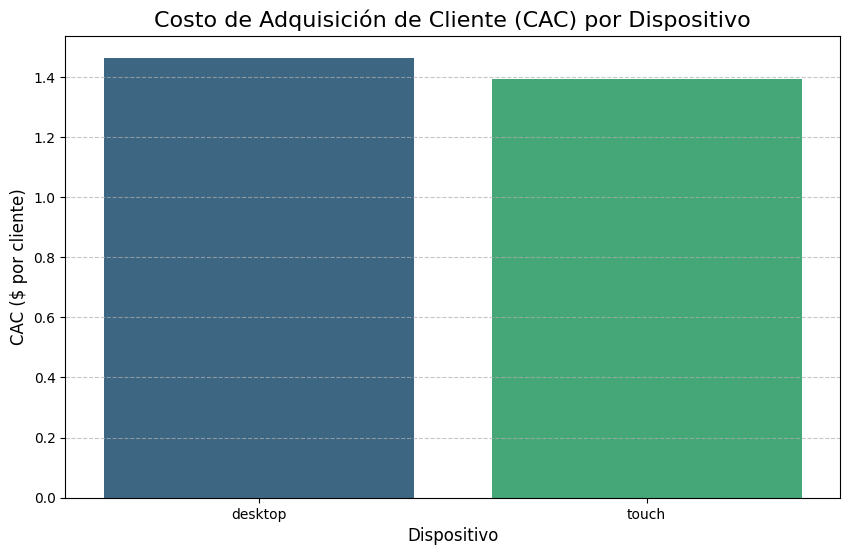

    device  total_costs_device  total_acquired_users       cac
0  desktop       235368.968747                160795  1.463783
1    touch        93762.651253                 67374  1.391674


In [93]:
# Gráfico CAC por dispositivo
plt.figure(figsize=(10, 6))
sns.barplot(x='device', y='cac', data=device_metrics.sort_values(by='cac', ascending=False), palette='viridis')
plt.title('Costo de Adquisición de Cliente (CAC) por Dispositivo', fontsize=16)
plt.xlabel('Dispositivo', fontsize=12)
plt.ylabel('CAC ($ por cliente)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Valores de CAC por dispositivo
print(device_metrics[['device', 'total_costs_device', 'total_acquired_users', 'cac']])

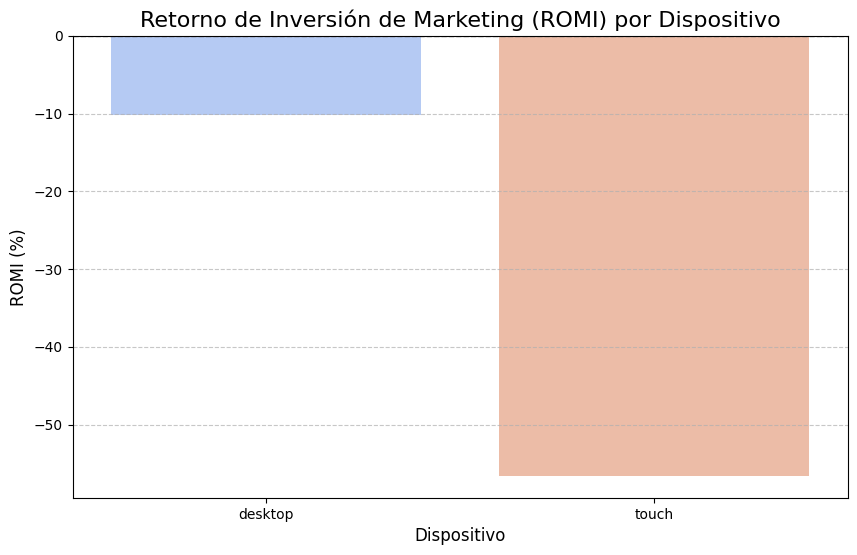

    device  total_costs_device  total_revenue  romi_percentage
0  desktop       235368.968747      211329.77        -10.21341
1    touch        93762.651253       40727.43        -56.56327


In [94]:
# Gráfico ROMI por dispositivo
plt.figure(figsize=(10, 6))
sns.barplot(x='device', y='romi_percentage', data=device_metrics.sort_values(by='romi_percentage', ascending=False), palette='coolwarm')
plt.title('Retorno de Inversión de Marketing (ROMI) por Dispositivo', fontsize=16)
plt.xlabel('Dispositivo', fontsize=12)
plt.ylabel('ROMI (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(0, color='grey', linestyle='--', linewidth=1)
plt.show()

# Valores de ROMI por dispositivo
print(device_metrics[['device', 'total_costs_device', 'total_revenue', 'romi_percentage']])

#### Observaciones clave:
1- ROMI por Dispositivo:
- Desktop: ROMI del -10.21%.
- Touch: ROMI significativamente más bajo del -56.56%.

2- Rentabilidad: 
- Ambos dispositivos muestran un ROMI negativo.
- La inversión en marketing en ambos genera pérdidas.
- Por cada dólar invertido se pierden 10 centavos en desktop y 56 centavos en touch.

3- Comparación de ROMI: 
- Ambos son negativos pero "desktop" es menos malo en términos de ROMI que Touch.
- Pierde menos por cada dólar invertido.

4- CAC vs. ROMI:
- Es más caro conseguir un usuario de escritorio que de Touch (CAC USD 1.46 para desktop vs. USD 1.39 para touch).
- Pero aunque los usuarios de desktop son más caros de adquirir, a su vez son menos costosos en términos de ROMI
- Aunque el costo inicial de adquisición es similar, los usuarios de desktop generan más ingresos o al menos mayor margen en relación con su costo (pérdida menor).
- Los usuarios de "touch" a pesar de ser un poco más baratos de adquirir, son menos rentables (generan mayores pérdidas).
- Los clientes adquiridos por dispositivos táctiles tienen un valor de vida (LTV) o un margen de contribución mucho menor que no justifica ni siquiera su costo de adquisición un tanto inferior.

#### Se pierde inversión de marketing en ambos canales de dispositivo, pero es más crítica con "touch" (más del quíntuple que en "desktop". A pesar de su CAC un poco más bajo, la rentabilidad de "touch" es muy pobre. Implica que si no se puede mejorar el ingreso de "usuarios touch", se debe repensar la inversión en marketing para ese segmento.

### 2.3.4.2 CAC y ROMI a lo largo del tiempo

In [95]:
# Cálculo CAC y ROMI mensuales por fuente
marketing_performance['cac'] = marketing_performance.apply(
    lambda row: row['costs'] / row['acquired_users'] if row['acquired_users'] > 0 else 0,
    axis=1
)

# ROMI mensual (requiere ingresos mensuales por fuente que no tenemos en marketing_performance)
# Recálculo monthly_revenue_by_source (sin device por ahora para ROMI por fuente y tiempo)
monthly_revenue_by_source_for_romi_time = order_with_acquisition_info.groupby(['order_month', 'acquisition_source_id'])['revenue'].sum().reset_index()
monthly_revenue_by_source_for_romi_time.columns = ['month', 'source_id', 'revenue']

# Unir con marketing_performance para tener revenue
marketing_performance_with_revenue = pd.merge(marketing_performance, monthly_revenue_by_source_for_romi_time, on=['month', 'source_id'], how='left')
marketing_performance_with_revenue['revenue'] = marketing_performance_with_revenue['revenue'].fillna(0)

# Calcular ROMI mensual
marketing_performance_with_revenue['romi'] = marketing_performance_with_revenue.apply(
    lambda row: (row['revenue'] - row['costs']) / row['costs'] if row['costs'] > 0 else (float('inf') if row['revenue'] > 0 else 0),
    axis=1
)
marketing_performance_with_revenue['romi_percentage'] = marketing_performance_with_revenue['romi'] * 100

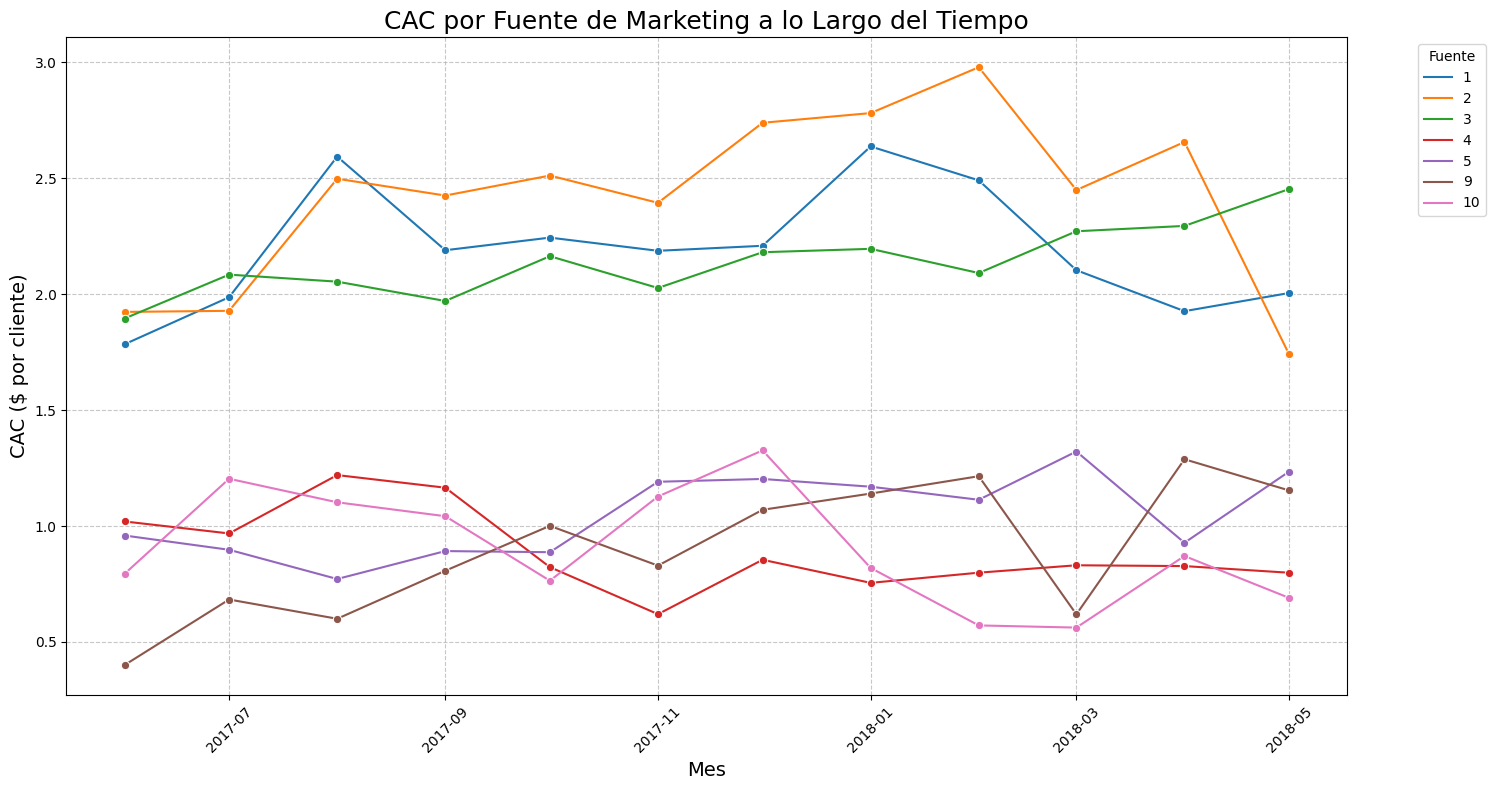

In [96]:
# Gráfico CAC por fuente a lo largo del tiempo
# Convertir 'month' de period a timestamp para que seaborn grafique
marketing_performance_with_revenue['month_datetime'] = marketing_performance_with_revenue['month'].dt.to_timestamp()

plt.figure(figsize=(15, 8))
# Usamos 'hue' para diferenciar las líneas por source_id
sns.lineplot(x='month_datetime', y='cac', hue='source_id', data=marketing_performance_with_revenue, marker='o', palette='tab10')
plt.title('CAC por Fuente de Marketing a lo Largo del Tiempo', fontsize=18)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('CAC ($ por cliente)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Fuente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Análisis del CAC por fuente a lo largo del tiempo
1 - Fuentes de CAC alto (líneas superiores):
- Fuente 3 (verde) y Fuente 2 (naranja):
    - Se mantienen con los CACs más altos a lo largo de todos los meses.
    - Fuente 2 con mucha volatilidad (picos y valles) pero siempre en la parte superior del gráfico, superando en ocasiones los USD 2.50 por cliente.
    - Fuente 3 también es alta y relativamente estable.
- Fuente 1 (azul) también tiene un CAC elevado, aunque tiende a la baja o estabilización en algunos meses.

2 - Fuentes de CAC medio a bajo (líneas inferiores):
- Fuente 4, 5, 9, y 10:
    - Tienen CACs más bajos, por debajo de USD 1.50.
    - Fuente 9 (morada clara) y 10 (rosa) muestran CACs más bajos por debajo de USD 1.00

3 - Fuentes ausentes / datos intermitentes:
- No todas las fuentes tienen líneas continuas en el período:
    - Falta de actividad: Talvez no hubo gasto, usuarios adquiridos e ingresos en ciertos meses.
    - División por cero: Si "acquired_users" fue 0 en un mes el CAC sería indefinido o 0 (si se manejó así). Talvez seaborn no dibuje esa porción de la línea.

### Las líneas representan actividad mensual: Si una fuente no aparece o tiene saltos, es porque no hubo datos válidos para ese mes específico.

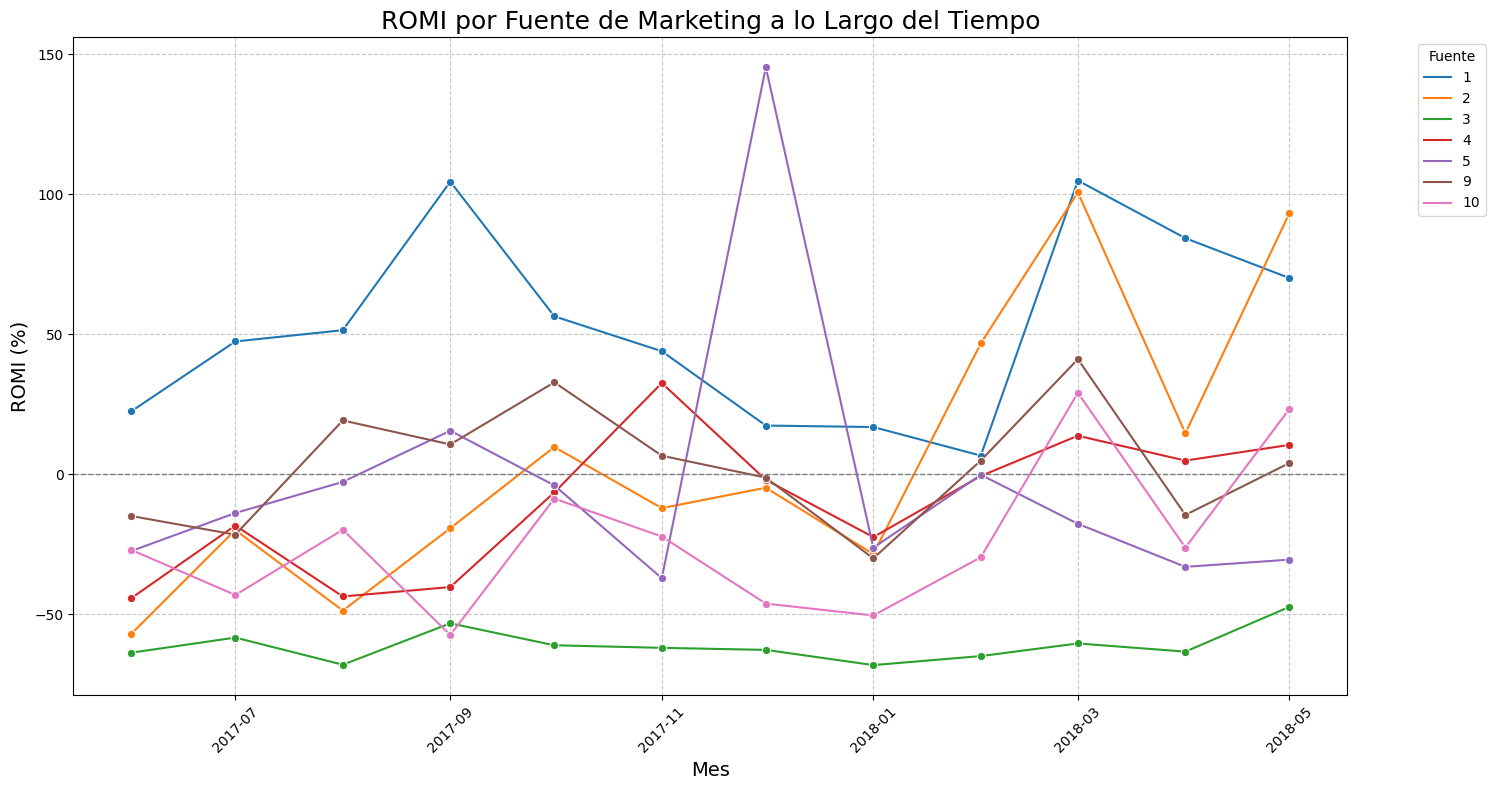

In [97]:
# Gráfico ROMI por fuente a lo largo del tiempo
plt.figure(figsize=(15, 8))
sns.lineplot(x='month_datetime', y='romi_percentage', hue='source_id', data=marketing_performance_with_revenue, marker='o', palette='tab10')
plt.title('ROMI por Fuente de Marketing a lo Largo del Tiempo', fontsize=18)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('ROMI (%)', fontsize=14)
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linestyle='--', linewidth=1) # línea en 0% para ver +/-
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Fuente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Análisis del ROMI por fuente de marketing a lo largo del tiempo
1 - ROMI Positivo (líneas por encima del 0%):
- Fuente 1 (azul oscuro): ROMI más positivo y con picos muy altos (supera el 100% en varios meses, más por septiembre 2017 y marzo 2018). Es la más rentable aunque su CAC no siempre fue el más bajo.
- Fuente 2 (naranja): A pesar de un CAC alto muestra un ROMI positivo la mayor parte del tiempo. Gran pico en marzo 2018 (cerca al 100%). Sus clientes son caros de adquirir pero valiosos.
- Fuente 9 (morada clara) Positiva o muy cerca a cero. Buen indicador de rentabilidad constante.

2 - ROMI Negativo (líneas por debajo del 0%):
- Fuente 3 (verde) la más crítica. ROMI muy negativo en todos los meses. A pesar de alta inversión, es constante en pérdidas.
- Fuente 4 (roja) y 10 (rosa) ROMI mayormente negativo. Fuente 10 con bajo CAC pero rendimiento de ROMI muy pobre, los usuarios no generan ingresos suficientes.
- Fuente 5 (marrón) oscila cercana al cero o ligeramente negativo. Sin tendencia clara de rentabilidad sostenida.
---
Conclusiones de la Evolución Temporal:
- Fuente 3: Alarma persiste, alto CAC y ROMI consistentemente negativo a lo largo del tiempo, confirman ser la principal fuente de pérdidas. Inversión continua aquí sin mejora en rentabilidad.
- Fuentes 1 y 2: Potencial valioso, a pesar de sus CAC´s no tan bajos, la capacidad para generar ROMI positivo e ncluso muy alto las hace atractivas. Analizar más qué causa picos de rentabilidad y cómo replicarlos.
- Fuentes 4, 5, 9, 10: Rendimientos mixtos. 9 con mejor rendimiento y consistente en el grupo de CAC´s bajos, mostrando un ROMI en general positivo.
- Fuentes 4 y 10 (bajo CAC pero ROMI negativo): Preocupa no tanto el costo de adquisición, sino, la calidad o valor de los clientes que traen. Investigar por qué estos clientes no monetizan.

In [98]:
# DF completo para revisar valores mensuales
# Métricas de marketing mensuales por fuente
print(marketing_performance_with_revenue[['month', 'source_id', 'costs', 'acquired_users', 'revenue', 'cac', 'romi_percentage']])

      month  source_id    costs  acquired_users  revenue       cac  \
0   2017-06          1  1125.61             631  1378.70  1.783851   
1   2017-06          2  2427.38            1262  1043.68  1.923439   
2   2017-06          3  7731.65            4080  2804.34  1.895012   
3   2017-06          4  3514.80            3447  1959.84  1.019669   
4   2017-06          5  2616.12            2728  1898.89  0.958988   
..      ...        ...      ...             ...      ...       ...   
79  2018-05          3  9411.42            3836  4953.62  2.453446   
80  2018-05          4  4214.21            5278  4656.30  0.798448   
81  2018-05          5  3669.56            2972  2550.39  1.234711   
82  2018-05          9   362.17             314   376.66  1.153408   
83  2018-05         10   409.86             594   505.46  0.690000   

    romi_percentage  
0         22.484697  
1        -57.003848  
2        -63.729088  
3        -44.240355  
4        -27.415791  
..              ...  
79   

# Paso 3. Conclusión (cuánto dinero invertir y dónde)

## 3.1 ¿Qué fuentes/plataformas recomendarías? (Fundamenta tu selección)
- Las recomendaciones de inversión y reasignación de presupuesto en marketing, se propone enfocarlas desde las métricas de Costo de Adquisición de Cliente (CAC) y Retorno de Inversión de Marketing (ROMI).
- Se debe complementar por el gasto total actual y el análisis temporal de estas métricas.
- Considerar también el rendimiento por dispositivo.

### Recomendaciones
##### A. Reducir o Detener Inversión (Prioridad Máxima)

###### 1 - Fuente 3:
- Recomendación:
    - Reducir drásticamente la inversión o pausar la actividad en esta fuente de inmediato.
    - Es la principal fuente de pérdidas, con el mayor gasto de USD 141 321,63
    - Un CAC alto
    - Un ROMI consistentemente negativo de -61.43% en promedio a lo largo de todo el periodo
    - Cada dólar invertido aquí genera una pérdida significativa.

- Justificación: 
    - El análisis temporal confirma que no hay indicios de mejora de rentabilidad para esta fuente y por lo tanto, mantener la inversión actual es insostenible y perjudica la rentabilidad global de la empresa.

###### 2 - Fuente 10:
- Recomendación: 
    - Revisar y reducir la inversión.
    - A pesar de un CAC bajo de USD 0.84, el ROMI es consistentemente negativo (-23.57% en promedio).
        
- Justificación:
    - Estos clientes no generan suficiente revenue para justificar el costo de adquisición, por más bajo que este sea. 
    - Es crucial investigar la calidad de estos clientes o si hay problemas en el proceso de monetización post-adquisición. 
    - Si no se identifica un camino hacia la rentabilidad, la inversión debe reducirse.

###### 3 - Fuente 4 y Fuente 5:
- Recomendación: Revisar y optimizar cuidadosamente. 
    - Considerar reducción si no hay mejoras. 
    - Ambas muestran ROMI negativos (-7.17% y -1.67% respectivamente) o cerca a cero en promedio.
            
- Justificación: 
    - Sus pérdidas no son tan severas como las de la Fuente 3 o 10, pero no están contribuyendo positivamente a la rentabilidad.
    - Se debe buscar optimizar en sus campañas o reducir el gasto si no se logra la rentabilidad.
---
##### B. Mantener y aumentar la inversión potencialmente mediante monitoreo
###### 1 - Fuente 1:
- Recomendación: 
    - Mantener la inversión actual y explorar oportunidades para aumentarla de forma estratégica. 
    - Tene un CAC alto en promedio de USD 20,833.27 pero tiene el ROMI más alto de 49.24% y picos de rentabilidad muy elevados.
- Justificación: 
    - Los clientes de F1 aunque caros, son muy valiosos y rentables. 
    - Investigar qué factores contribuyen a sus picos de ROMI para intentar replicarlos
    - Y escalar la inversión en los períodos o campañas más efectivas.

###### 2 - Fuente 2:
- Recomendación: 
    - Mantener inversión actual y monitorear de cerca. 
    - A pesar de tener el CAC más alto de USD 42,806.04, su ROMI es positivo (9.61%) y muestra periodos de alta rentabilidad.
- Justificación: 
    - Son clientes valiosos. Monitorear CAC para que no se dispare más y optimizar las campañas de mejora (ROMI positivo).

###### 3 - Fuente 9:
- Recomendación:
    - Mantener y considerar un ligero aumento de la inversión.
    - CAC bajo de USD 0.85 y ROMI algo positivo 4.38% (se mantiene por encima del punto de equilibrio en el tiempo).
- Justificación: 
    - F9 es eficiente, rentable y estable. 
    - Canal sólido que puede escalarse para adquirir más clientes rentables.

###### 4 - Fuente 7:
- Recomendación: 
    - Mantener y comprender su naturaleza. 
    - Costo de USD 0.00 y ROMI "infinito", seguramente por ser una fuente orgánica o de referencia.
- Justificación: 
    - No hay costo directo, pero es vital entender el mecanismo de la fuente para asegurar que siga generando ingresos.
---
##### C. Estrategia por dispositivo
###### 1 - Recomendación: Reorientar presupuesto hacia "desktop" y reevaluar inversión en "touch":
- Justificación: 
    - Ambos dispositivos arrojan ROMI negativos e indica pérdidas globales. 
    - Pero "touch" es mucho menos rentable (-56.56% ROMI) que "desktop" (-10.21% ROMI) aunque tenga un CAC poco inferior.
    - Sugiere que usuarios de "touch" son de menor valor o tienen problemas de monetización.
- Priorizar optimización de campañas para "desktop" y reducir así las pérdidas.
- Investigar la UX y monetización en "touch" para intentar revertir pérdidas y si no mejora, minimizar inversión.
---
##### D. Recomendaciones Estratégicas Generales
###### 1 - Implementar un monitoreo continuo y detallado: 
- Sistema de reporting mensual e incluso semanal que vigille el CAC, ROMI y LTV por fuente y dispositivo.
- Esto permitirá una reasignación ágil del presupuesto.

###### 2 - Investigación de calidad de clientes: 
- Para fuentes con bajo CAC pero ROMI negativo como F10, F4 y "touch", investigar comportamiento de usuarios post-adquisición
- Saber:
    - ¿por qué no compran o generan poco revenue?
    - ¿Hay problemas con la retención?
    - ¿El producto no resuena con ese segmento?

###### 3 - Monitoreo continuo y detallado: 
- Benchmarking y optimización constante:
    - Comparar el rendimiento con estándares de la industria
    - Realizar pruebas A/B en las campañas de fuentes rentables para maximizar más su eficiencia.

## 3.1.1 ¿En qué métricas te enfocaste? y ¿Por qué?
#### 1 - Retorno de inversión de marketing (ROMI): 
- Métrica más crítica, puesto que mide la rentabilidad directa de cada inversión en marketing.
- Un ROMI positivo significa que la inversión genera ganancias mientras que un ROMI negativo significa pérdidas.<br>
##### ¿Por qué?
- Saber si la inversión genera retorno o pérdidas
- Crucial para cualquier estrategia de inversión.<br><br>

#### 2 - Costo de adquisición de cliente (CAC): 
- Mide la eficiencia en la adquisición de clientes.
- Se debe considerar junto con el ROMI, ya que un CAC bajo no siempre garantiza rentabilidad y viceversa.<br>
##### ¿Por qué?
- Un CAC bajo es deseable, pero si los clientes no generan ingresos el ROMI será negativo.
- Un CAC alto puede ser aceptable si el ROMI es positivo y el LTV es alto (integrar ambos).<br><br>

#### 3 - Gasto total de marketing por fuente: 
- Para dimensionar la inversión actual en cada canal.<br>
##### ¿Por qué?
- Dónde se está invirtiendo actualmente la mayor parte del presupuesto y contrastarlo con la rentabilidad.<br><br>
  
#### 4 - Tendencias temporales (CAC y ROMI): 
- Observar cómo estas métricas evolucionan mes a mes para identificar consistencia, picos, caídas o mejoras a lo largo del tiempo.
- Las métricas agregadas pueden ocultar problemas o éxitos puntuales.<br>
##### ¿Por qué?
- El análisis mes a mes nos ayuda a identificar si el rendimiento es consistente o si hay momentos específicos de mejora o en su defecto deterioro.<br><br>

#### 5 - Rendimiento por Dispositivo: 
- Para identificar diferencias en rentabilidad y costo según el tipo de dispositivo de adquisición.<br>
##### ¿Por qué?
- Permite optimizar estrategias de marketing según la plataforma donde los usuarios son más rentables o menos costosos de adquirir.<

## 3.1.2 ¿Qué conclusiones sacaste después de encontrar los valores métricos?

### Conclusiones
##### Ineficiencia crítica en la asignación de presupuesto: 
- Hay una grave disparidad entre la inversión de marketing y la rentabilidad real.
- La empresa invierte la mayor parte de su presupuesto en fuentes que no son rentables.
- La falta de un análisis de datos profundo y continuo ha llevado a esta situación de pérdidas.

##### Fuente 3: La Principal Causa de Pérdidas
- Esta fuente representa la mayor inversión de marketing USD 141 321,63.
- Muestra consistentemente el ROMI más bajo y negativo de USD61.43% a lo largo de todo el periodo.
- Su alto CAC se combina con una incapacidad para generar ingresos que justifiquen el gasto (principal alarma).

##### Fuentes 4 y 10: 
- Bajo CAC pero no rentables, a pesar de tener un costo de adquisición de cliente relativamente bajo, USD 1.01 para F4 y USD 0.84 para F10.
- Sus ROMI´s se mantienen negativos, -7.17% para F4 y -23.57% para F10.
- Aunque son eficientes en la adquisición, estos clientes no generan suficiente valor.

##### Fuentes 1 y 2: 
- Alto CAC pero también rentables. La Fuente 1 tiene el ROMI más alto de 49.24% y se mantiene positivo a lo largo del tiempo
    - Presenta picos de gran rentabilidad a pesar de su CAC elevado USD 20 833,27 en general, pero variable mensualmente).
- La Fuente 2 también muestra un ROMI positivo de 9.61% y a pesar de tener el CAC más alto en general de USD42,806.04 (sus clientes son valiosos).

##### Rendimiento del dispositivo: 
- Pérdidas generalizadas pero con "touch" peor. Ambos dispositivos (Desktop y Touch) muestran un ROMI negativo
- Significa que la inversión de marketing mediante estos genera pérdidas.
- Los dispositivos "touch" presentan una pérdida mucho mayor (-56.56%) en comparación con "desktop" (-10.21%)
- Esto a pesar de que el CAC de Touch es ligeramente inferior (usuarios de "touch" son significativamente menos rentables).

##### Desconocimiento del valor real de las inversiones: 
- Pérdidas generadas en canales clave y asignación desproporcionadas de presupuesto demuestran un claro desconocimiento del valor real
- Por ende, un desconocimiento tambièn sobre el retorno de la inversión en los diferentes canales de marketing.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Tienes un muy buen análisis de este proyecto, te felicito!

Siempre este tipo de análisis que son un poco más complejos hay que buscar cómo explicarlos de manera sencilla considerando la audiencia a la cual se va a presentar los resultados y es ahí donde las visualizaciones juegan un papel muy importante ya que con una visualización es mucho más fácil entender la explicación que con solo valores numéricos.

Muy buen trabajo, saludos!
</div>